In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from timeit import time
from shape import Shape, Block
from shape_boat import ShapeBoat, ShapeBoat_spline
from multiboat_trajectory_optimization.boat_models import Boat
from shapeshift_trajectory import shapeshift_trajectory, write_results, experiments, print_results_tables


## 1. Composing Shapes from Blocks

In [2]:
s = .90625

shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])
shape_2d = Shape([Block(0,-.5,90,scale=s) ,Block(0,.5,90,scale=s)])
shape_3a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s)])
shape_3b = Shape([Block(-.5,0,scale=s),    Block(.5,0,0,scale=s), Block(-.5,0.5,scale=s)])
shape_3c = Shape([Block(0,0,scale=s),      Block(-1,0,scale=s),   Block(1,0,scale=s)])
shape_4a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s),Block(1.25,0.25,90,scale=s)])
shape_4b = Shape([Block(-.5,-.25,scale=s), Block(-.5,.25,scale=s),Block(.5,-.25,scale=s),      Block(.5,.25,scale=s)])
shape_6a = Shape([Block(0,0,scale=s),      Block(1.,0,scale=s),   Block(0,0.5,scale=s),        Block(-1.,0.5,scale=s),Block(1.,0.5,scale=s),Block(1.,-.5,scale=s)])

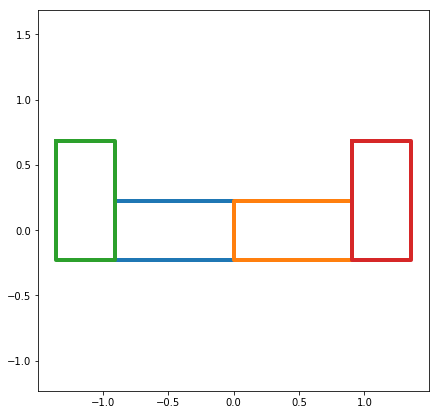

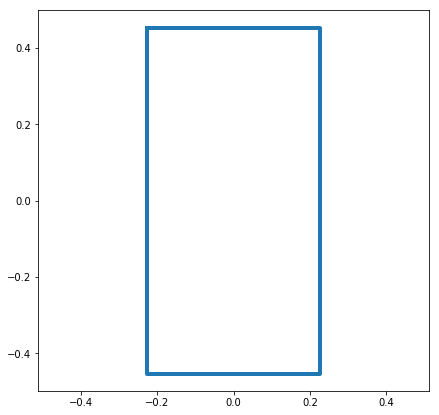

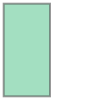

In [3]:
moving_shape=shape_4a
obstacle_shape=shape_1b

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)
from shapely import ops, geometry
obstacle_shape.polygon.simplify(0.2, preserve_topology=False)


### Partitioning of convex hulls around shape

In [4]:
msums, hulls = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

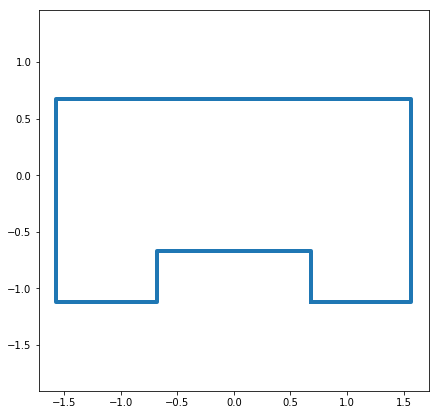

In [5]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

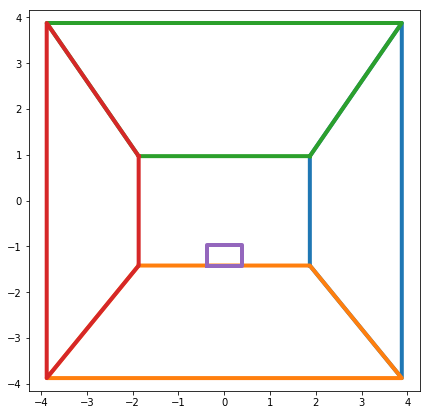

In [6]:
moving_shape.plot_polygons(hulls.values()[3])

## 2. Trajectory Planning

In [7]:
tests = {'1_line_to_L':         (shape_1a, shape_2a, (s*-1.5, s*0.,     0.),  (s*-1,    s*.5,    0.)),  \
         '2_T_to_block':        (shape_1a, shape_3b, (s*-1.5, s*0.,     0.),  (s*.5,    s*.5,    0.)),  \
         '3_line_to_block':     (shape_2a, shape_2a, (s*-2.,  s*0.,     0.),  (s*0.,    s*.5,    0.)),  \
         '4_line_to_L_2':       (shape_2a, shape_2a, (s*-2.,  s*0.,     0.),  (s*-1.25, s*.75,  90.)),  \
         '5_U_to_block':        (shape_3a, shape_3a, (s*2.5,  s*0.,     0.),  (s*0.,    s*.5,  180.)),  \
         '6_line_to_block_2':   (shape_4b, shape_4b, (s*-2.,  s*0.,     0.),  (s*0.,    s*1.,    0.)),  \
         '7_rhombus_to_block': (shape_6a, shape_6a, (s*0.,    s*1.5,   180.),  (s*0.,   s*-.5,  180.)),  \
         '8_past':              (shape_1a, shape_4a, (s*-3.,  s*0.,     0.),  (s*3.,    s*0.,    0.)),  \
         '9_pool_a':          (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*-.25,  s*1.,    0.)),  \
         '10_pool_b':         (shape_1b, shape_2c, (s*-.75, s*0.,     0.),  (s*0.,    s*.75,   90)),  \
#         '11_shinkyu3-1':       (shape_2c, shape_1b, (s*-.75, s*0.,     0.),  (s*0.,    s*1.,    0.)),  \
#         '12_shinkyu3-2':       (shape_1b, shape_2d, (s*-.75, s*0.5,    0.),  (s*0.,    s*1.5,   0.))
        }

### MIQP - b-splines

SETTING ENDPOINTS
Calculated C-Space: 0.197565 seconds
Set up graph: 0.197576 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


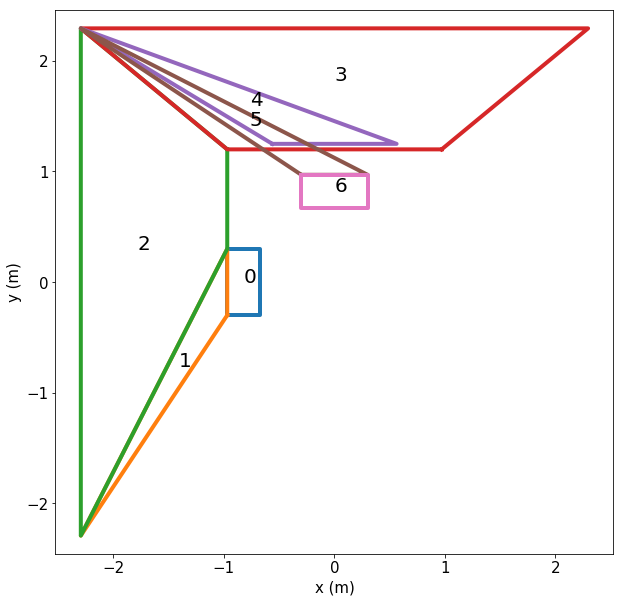

INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.002298 seconds
ADDING COSTS
Number of costs 13
0.007889 seconds
ADDING CONSTRAINTS
None
Number of constraints 1170
0.181313 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.320370 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.181234 seconds
Set up graph: 0.200157 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


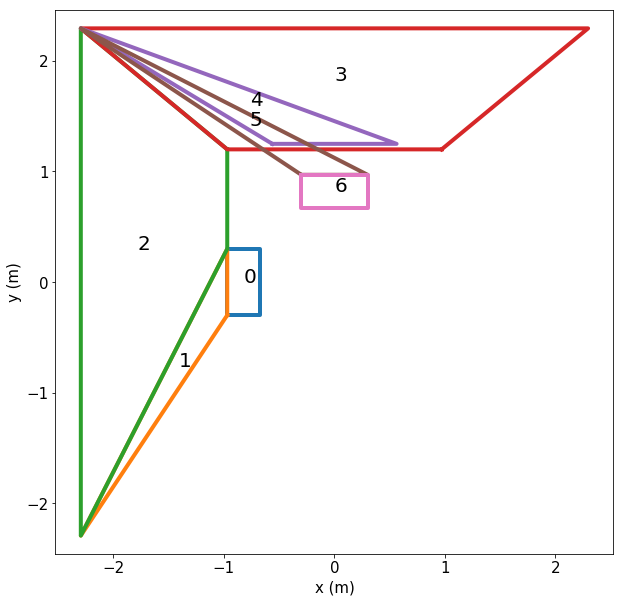

INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002238 seconds
ADDING COSTS
Number of costs 12
0.006321 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 32
0.047418 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.035620 seconds

trajs (1, 12, 6) (1, 11, 4)
Time Scaling target: 1.000000, result: 1.000000


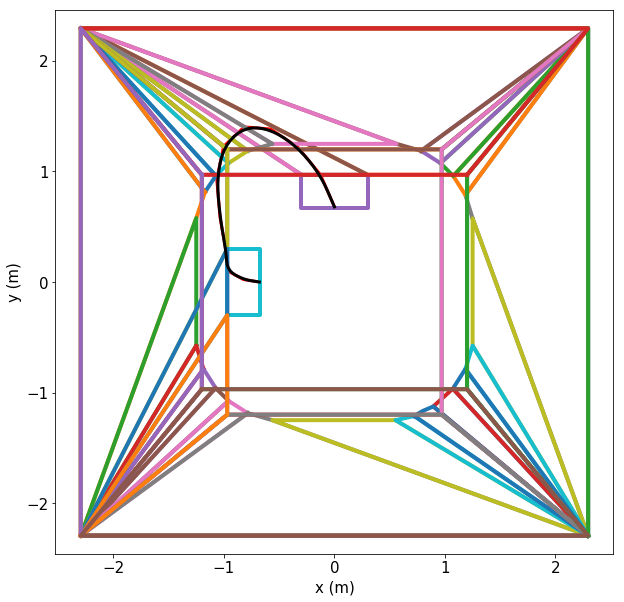

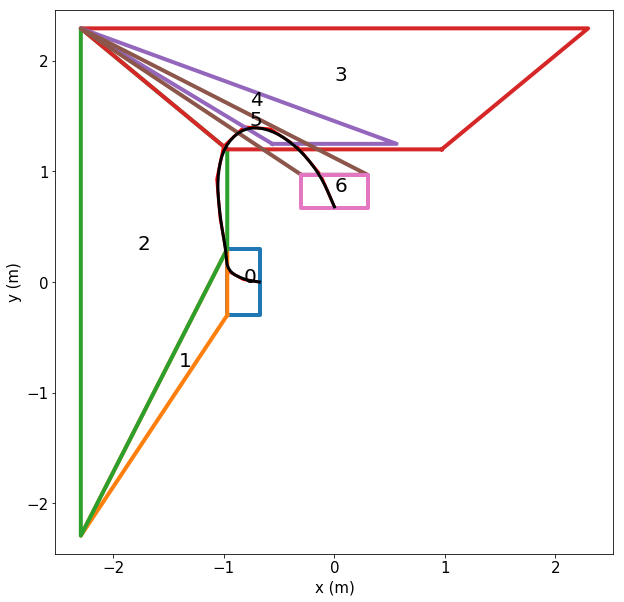

In [8]:
test = '10_pool_b'

x = time.time()
experiment = shapeshift_trajectory(*tests[test], N=11, boat_type_init=ShapeBoat_spline)
#print experiment['S'].shape, experiment['U'].shape
np.savetxt("shapeshifting_test_%s.txt" % test, np.hstack((experiment['S'][0,:,:],experiment['U'][0,:,:])), delimiter=",")

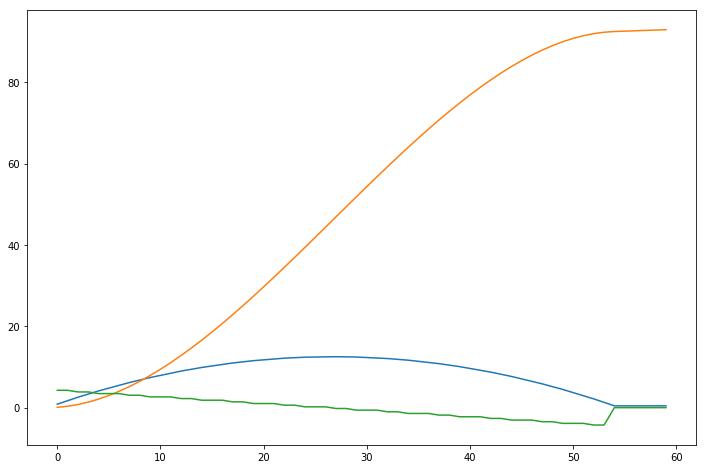

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
#plt.plot(experiment['S'][0,1:,2])

plt.plot(experiment['S'][0,1:,5])
plt.plot(experiment['S'][0,1:,2])
plt.plot(experiment['U'][0,1:,2])

#plt.plot(experiment['S_knots'][0,:,2])
#plt.plot(experiment['U_knots'][0,:,2])
#plt.plot(experiment['U_knots'][0,:,3])


In [10]:
def plot_exp(exp):
b2.plot_x0xN(b.toBoatPlotStates([exp]))

IndentationError: expected an indented block (<ipython-input-10-52918f654bea>, line 2)

In [ ]:
from matplotlib import pyplot as plt
plot = plt.subplots(nrows=1,ncols=1, figsize=(16,16))
b= experiment['boat']
b2 = Boat()
b2.plot_configurations(b.toBoatPlotStates(np.array([[[0,0,0,0,0,0]]])),boat_color='gainsboro',edge_color='silver', edge_width=5, plot=plot)
b2.plot_configurations(b.toBoatPlotStates(experiment['S'])[:,:],boat_color='black',edge_color='silver', edge_width=5, plot=plot, stride=3)
plt.axis('equal')
plt.xlabel('x (m)', fontsize='15')
plt.ylabel('y (m)', fontsize='15')
plt.tick_params(labelsize='15')
plt.show()

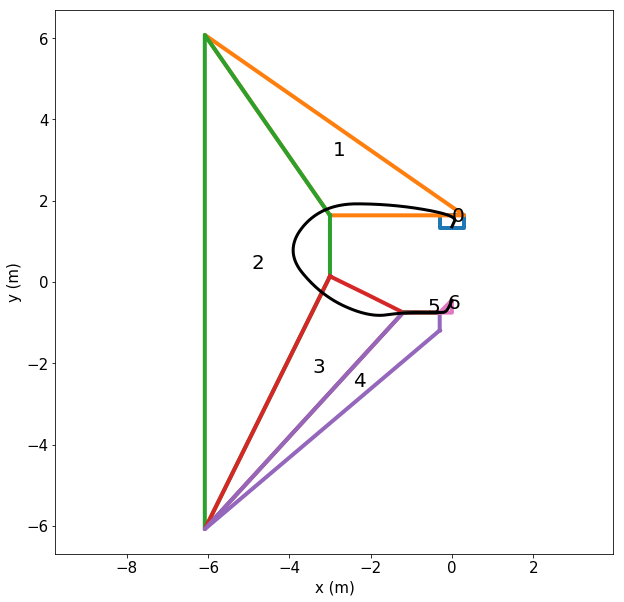

In [15]:
b.plot_hulls(both=False, S=experiment['S'])

In [33]:
#print experiment['S'][0,:,2]

In [11]:
print b.toBoatPlotStates(experiment['S'])[:,:2]

[3.14159265 3.14145489 3.14131712 3.14117935 3.14104159 3.14090382
 3.14076605 3.14062829 3.14049052 3.14035275 3.14021499 3.14007722
 3.13993945 3.13980169 3.13966392 3.13952615 3.13938839 3.13925062
 3.13911285 3.13897509 3.13883732 3.13869956 3.13856179 3.13842402
 3.13828626 3.13814849 3.13801072 3.13592979 3.13384886 3.13176793
 3.129687   3.12760606 3.12552513 3.1234442  3.12136327 3.11928234
 3.11720141 3.11512047 3.11303954 3.11095861 3.10887768 3.10679675
 3.10471582 3.10263489 3.10055395 3.09847302 3.09639209 3.09431116
 3.09223023 3.0901493  3.08806836 3.08598743 3.14159265 3.14148113
 3.1413696  3.14125808 3.14114655 3.14103503 3.1409235  3.14081198
 3.14070045 3.14058893 3.1404774  3.14036587 3.14025435 3.14014282
 3.1400313  3.13991977 3.13980825 3.13969672 3.1395852  3.13947367
 3.13936215 3.13925062 3.1391391  3.13902757 3.13891605 3.13880452
 3.13869299 3.13702143 3.13534986 3.13367829 3.13200672 3.13033515
 3.12866359 3.12699202 3.12532045 3.12364888 3.12197731 3.1203

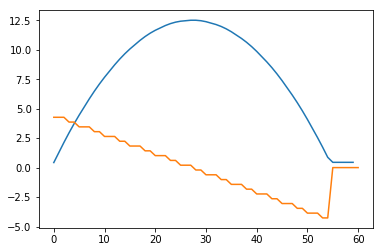

In [10]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(5*(experiment['S'][0,1:,2]-experiment['S'][0,:-1,2]))
plt.plot(experiment['U'][0,:,2])
plt.show()

### Show polytope graph from plan

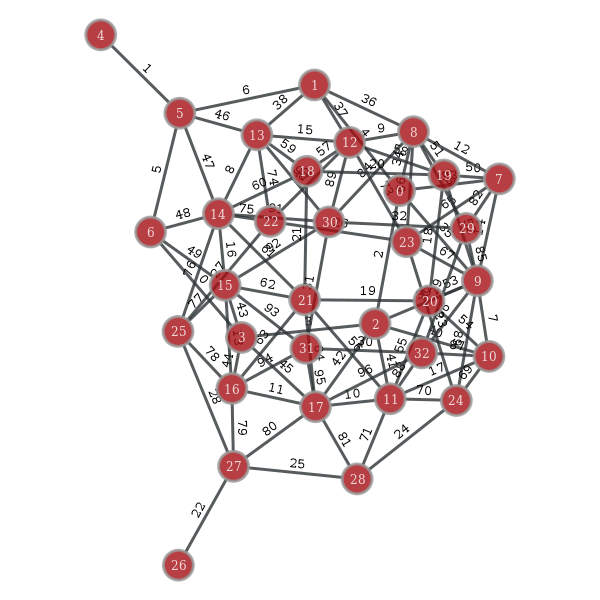

In [56]:
experiment['boat'].g.draw_graph()

## 3. Running Experiments

SETTING ENDPOINTS
Calculated C-Space: 0.219757 seconds
Set up graph: 0.829888 seconds
finding_vertex POINT (2.265625 0) 0.0
finding_vertex POINT (0 0.453125) 180.0
found path endpoint hulls 102 87


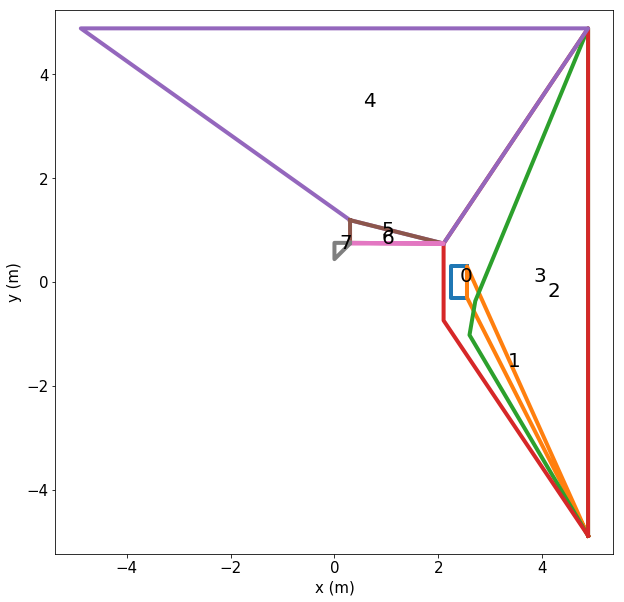

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 186
0.007075 seconds
ADDING COSTS
Number of costs 2
0.001747 seconds
ADDING CONSTRAINTS
None
Number of constraints 706
0.116715 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.057056 seconds



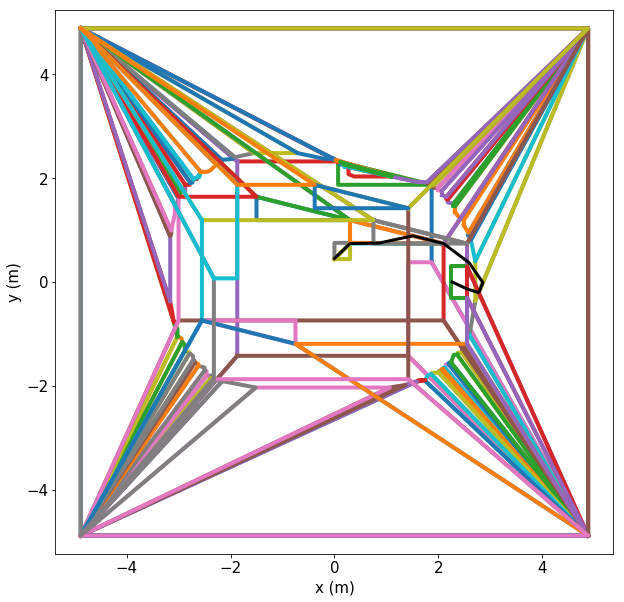

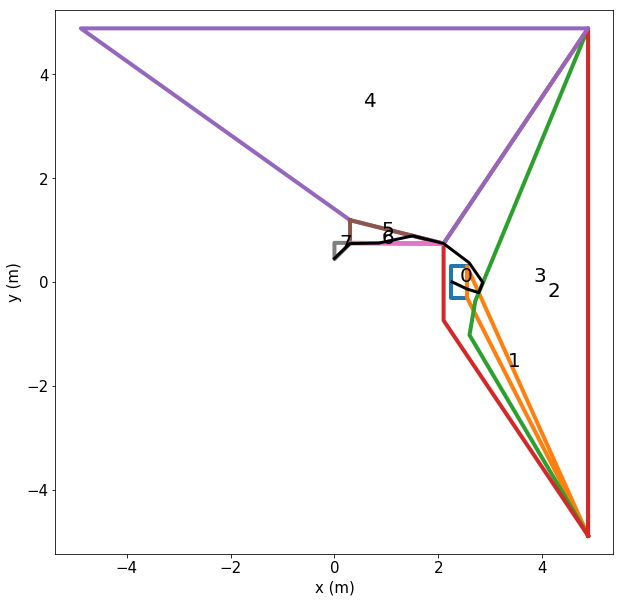

SETTING ENDPOINTS
Calculated C-Space: 0.205879 seconds
Set up graph: 0.222306 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.453125) 0.0
found path endpoint hulls 44 47


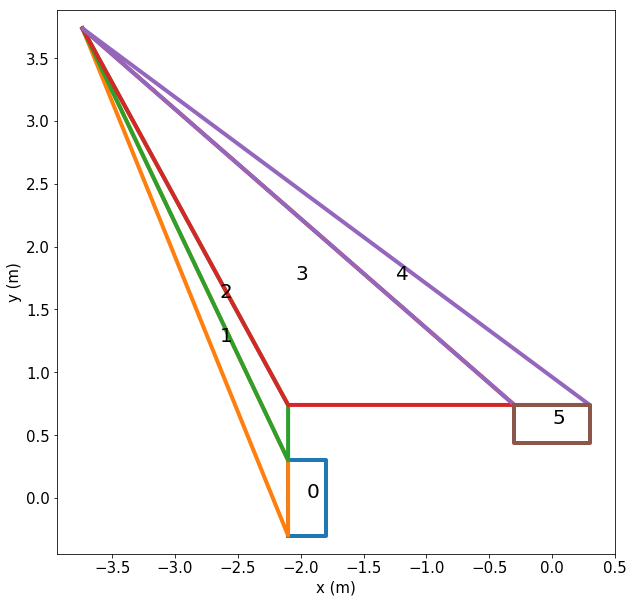

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.005799 seconds
ADDING COSTS
Number of costs 2
0.001626 seconds
ADDING CONSTRAINTS
None
Number of constraints 490
0.048436 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.114991 seconds



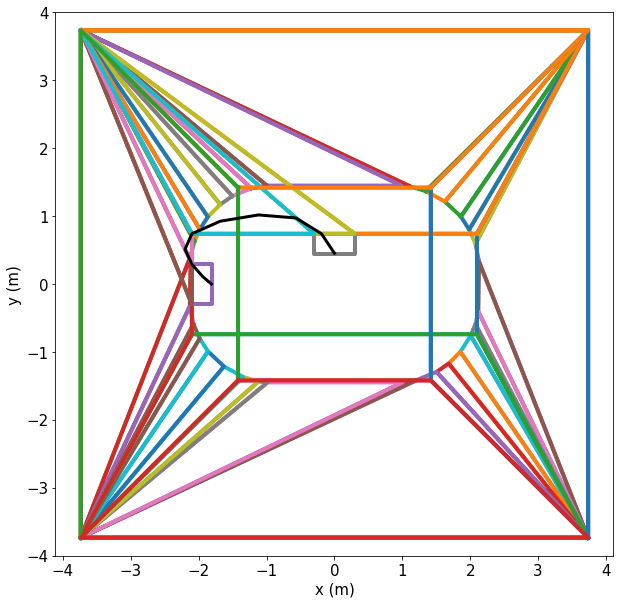

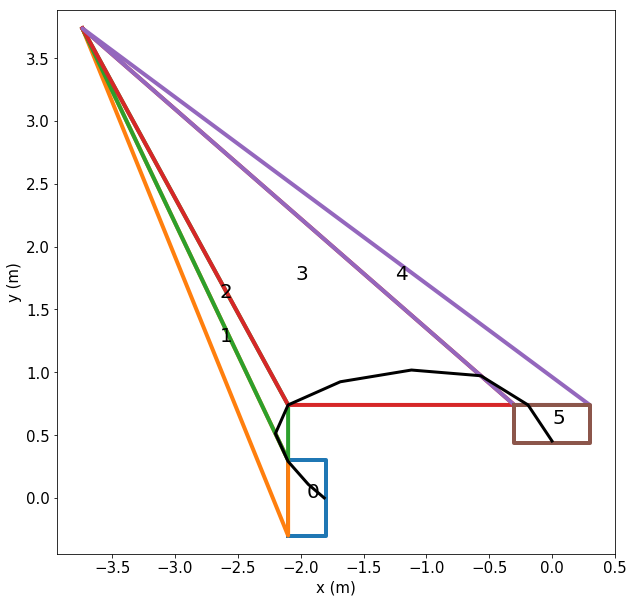

SETTING ENDPOINTS
Calculated C-Space: 0.176314 seconds
Set up graph: 0.175021 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


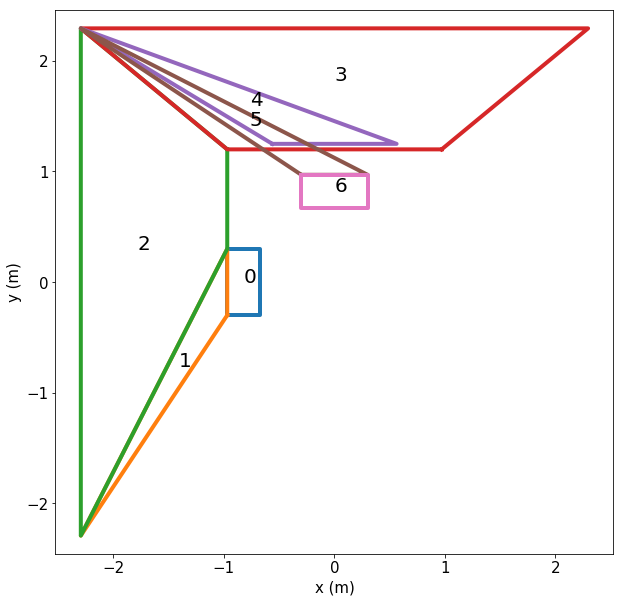

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.003338 seconds
ADDING COSTS
Number of costs 2
0.001900 seconds
ADDING CONSTRAINTS
None
Number of constraints 608
0.071315 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.100824 seconds



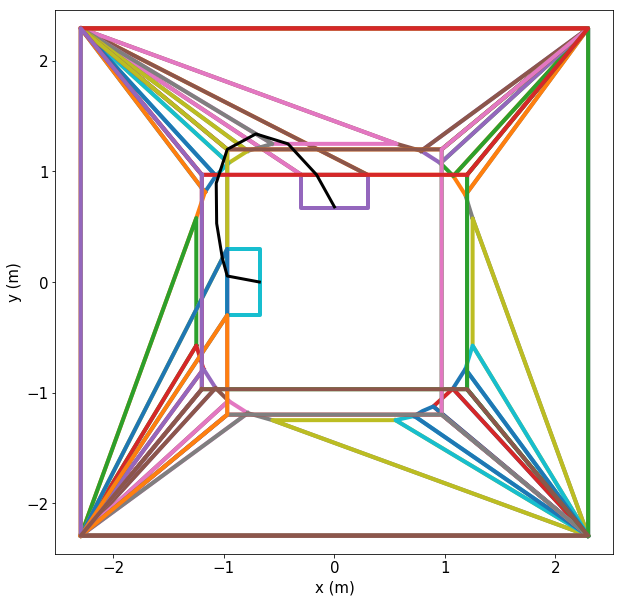

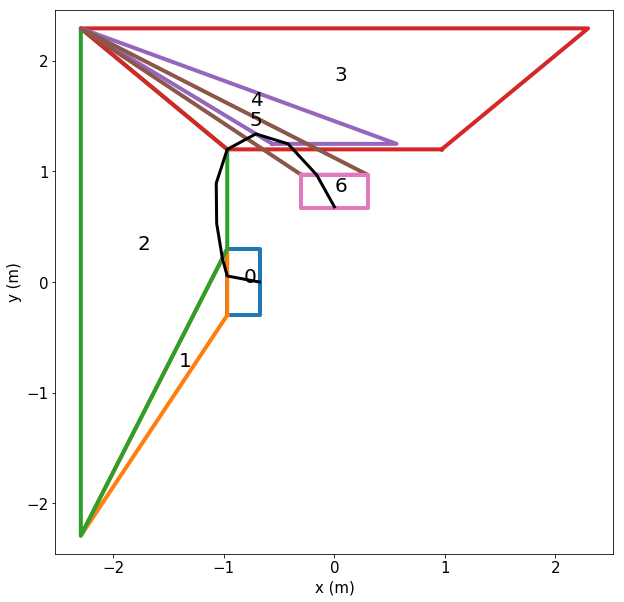

SETTING ENDPOINTS
Calculated C-Space: 0.256608 seconds
Set up graph: 0.246094 seconds
finding_vertex POINT (-2.71875 0) 0.0
finding_vertex POINT (2.71875 0) 0.0
found path endpoint hulls 27 5


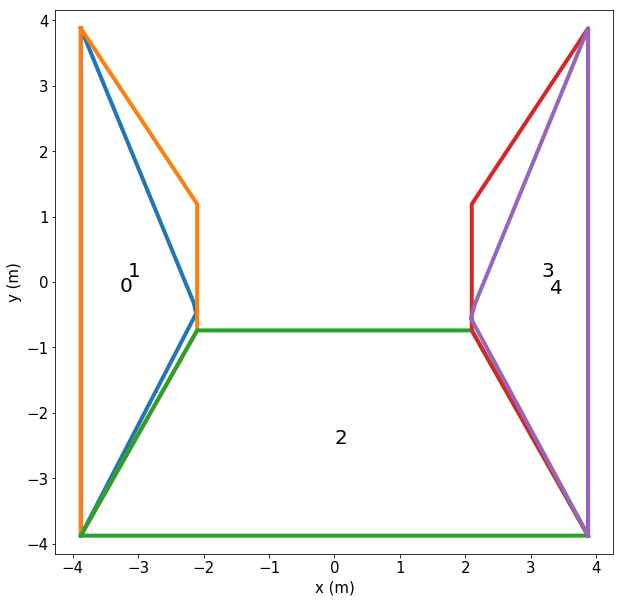

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.007758 seconds
ADDING COSTS
Number of costs 2
0.001615 seconds
ADDING CONSTRAINTS
None
Number of constraints 472
0.046234 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.105069 seconds



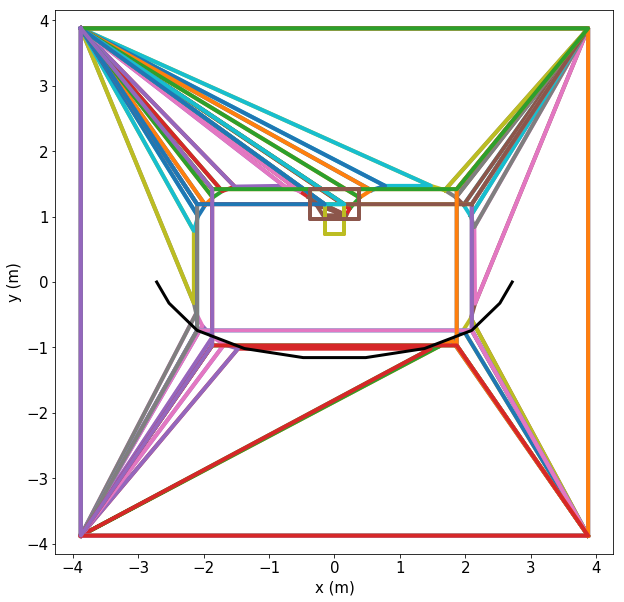

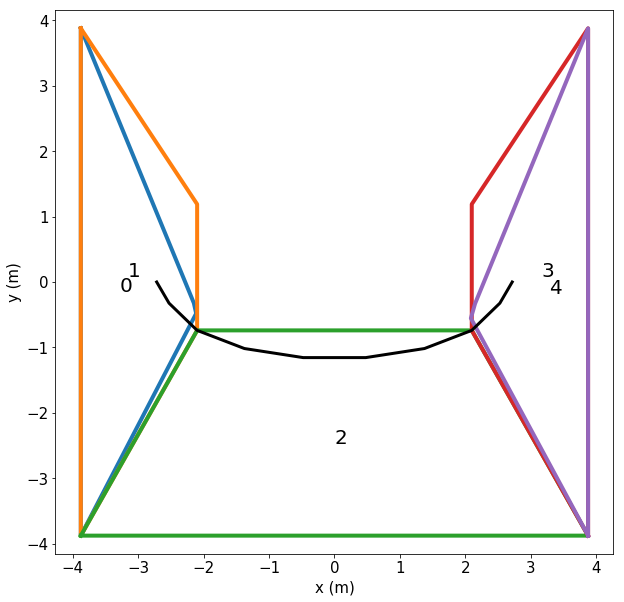

SETTING ENDPOINTS
Calculated C-Space: 0.199472 seconds
Set up graph: 0.215125 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (-1.1328125 0.6796875) 90.0
found path endpoint hulls 47 4


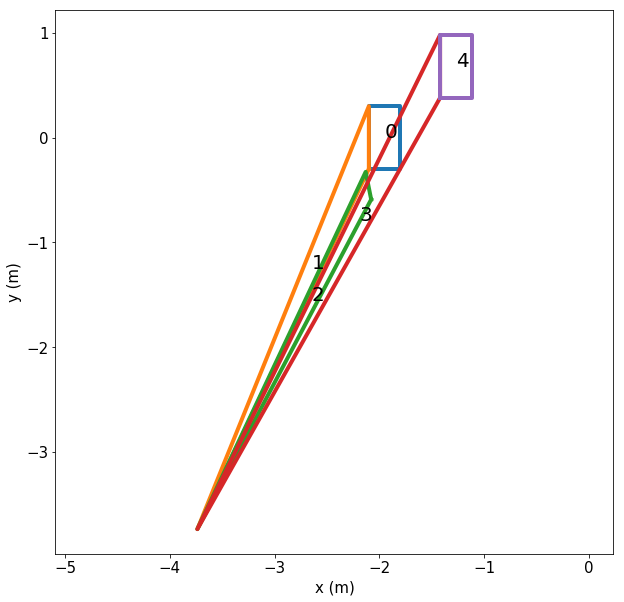

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002239 seconds
ADDING COSTS
Number of costs 2
0.011942 seconds
ADDING CONSTRAINTS
None
Number of constraints 412
0.047078 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.120789 seconds



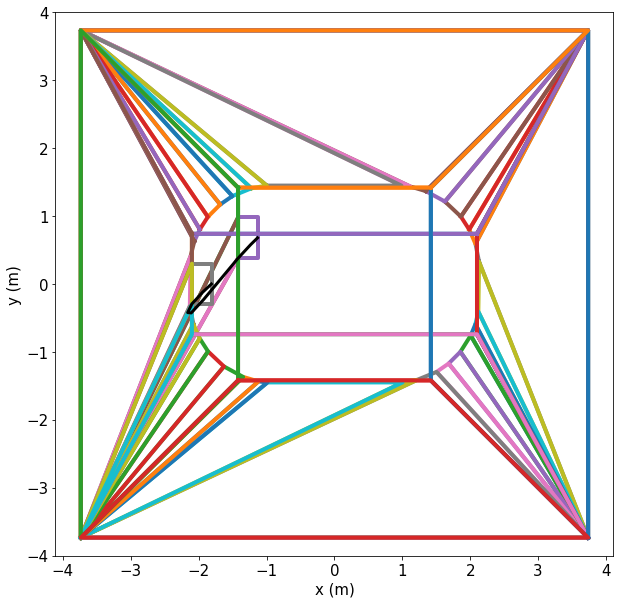

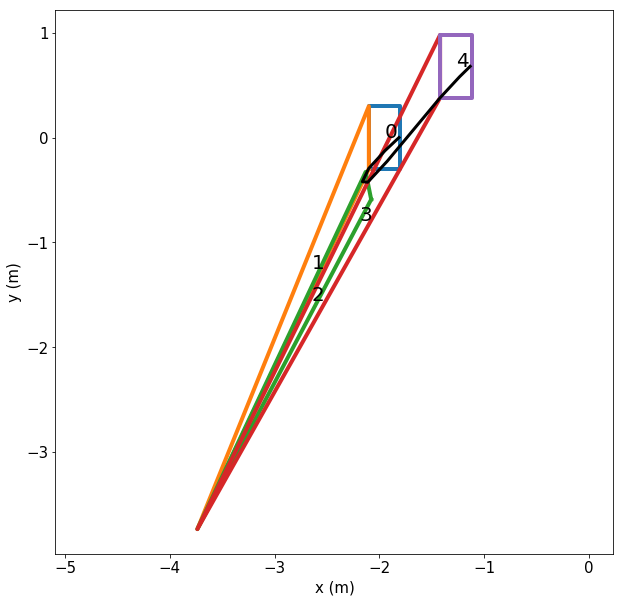

SETTING ENDPOINTS
Calculated C-Space: 0.805535 seconds
Set up graph: 0.741057 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (0 -0.453125) 180.0
found path endpoint hulls 70 66


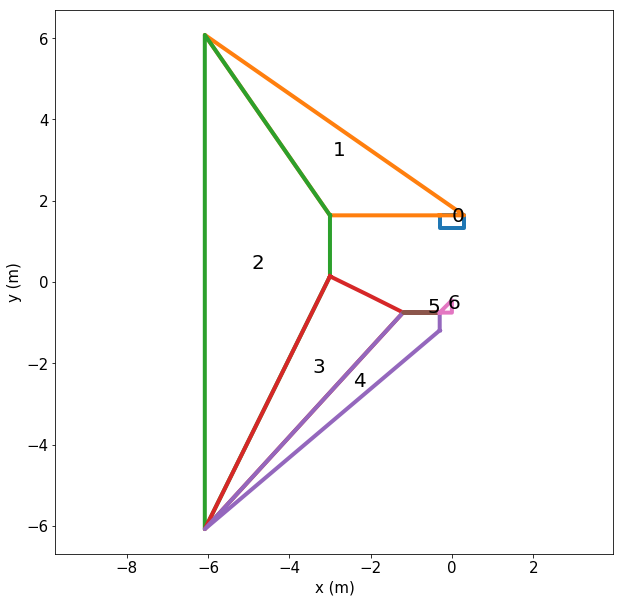

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.002219 seconds
ADDING COSTS
Number of costs 2
0.001564 seconds
ADDING CONSTRAINTS
None
Number of constraints 648
0.048774 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.096631 seconds



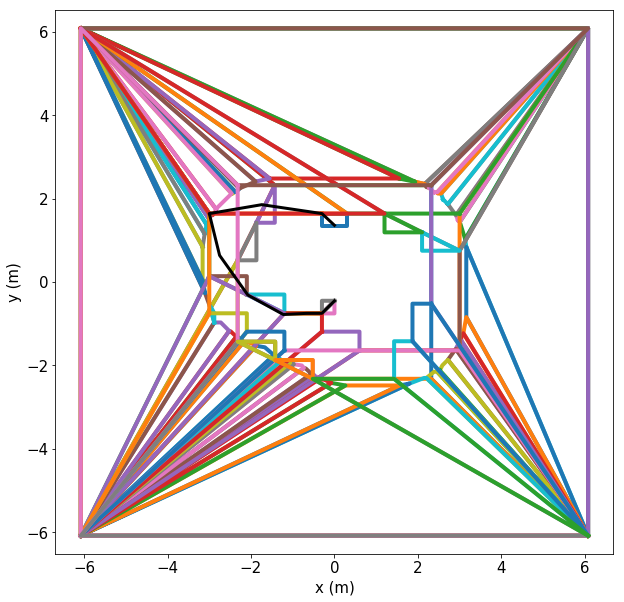

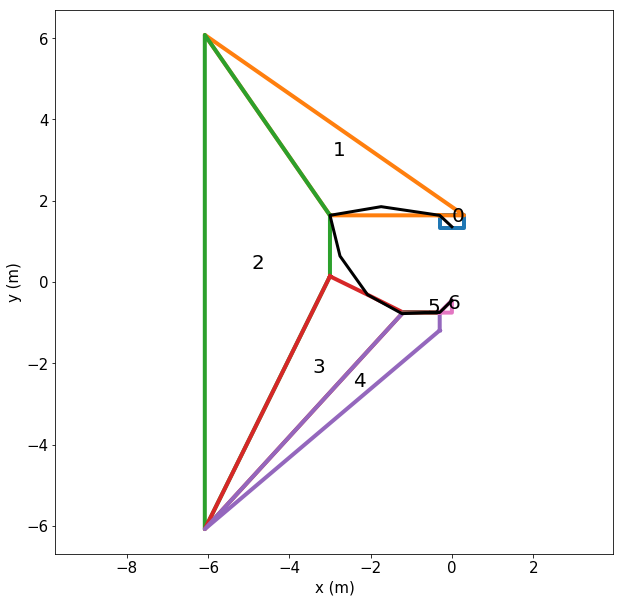

SETTING ENDPOINTS
Calculated C-Space: 0.245083 seconds
Set up graph: 0.280982 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (0.453125 0.453125) 0.0
found path endpoint hulls 39 43


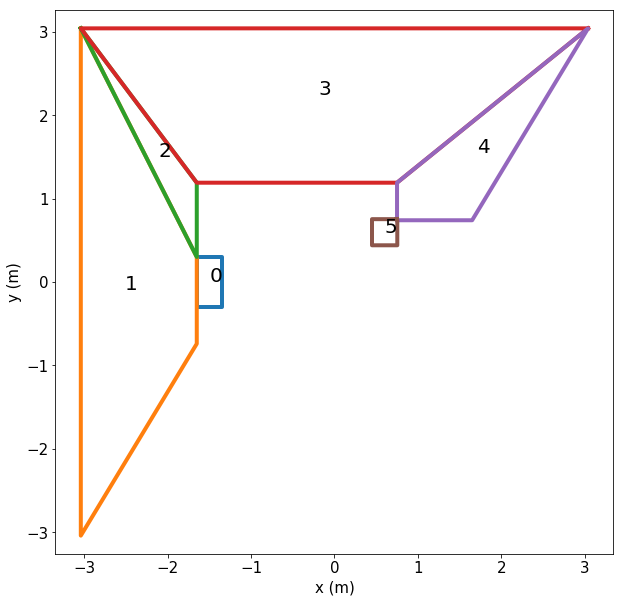

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.006721 seconds
ADDING COSTS
Number of costs 2
0.003258 seconds
ADDING CONSTRAINTS
None
Number of constraints 610
0.115349 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.110984 seconds



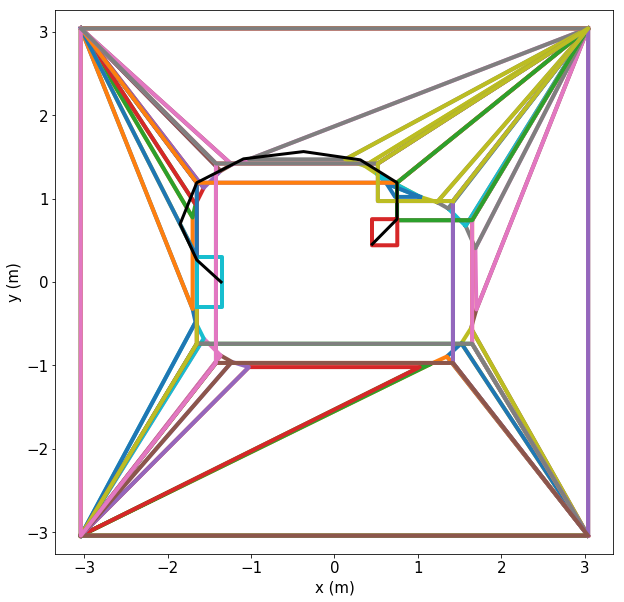

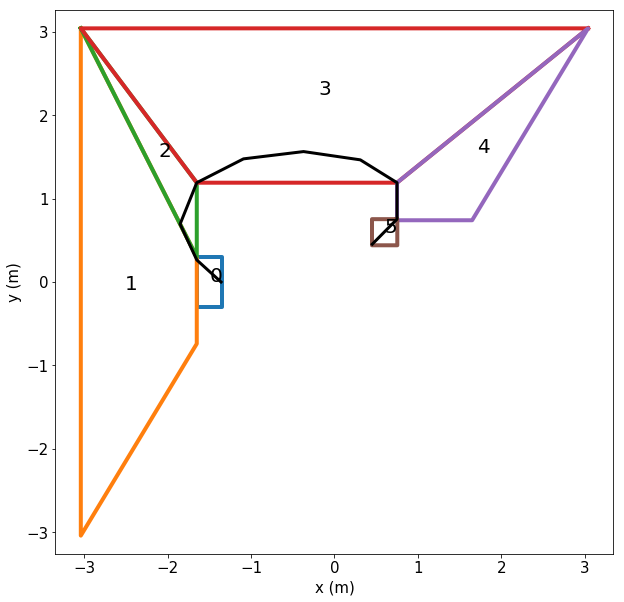

SETTING ENDPOINTS
Calculated C-Space: 0.189373 seconds
Set up graph: 0.173638 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (-0.90625 0.453125) 0.0
found path endpoint hulls 36 39


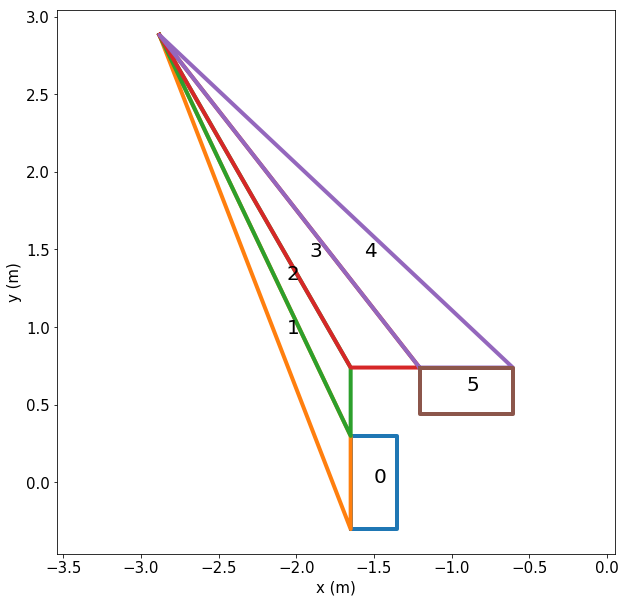

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001982 seconds
ADDING COSTS
Number of costs 2
0.001446 seconds
ADDING CONSTRAINTS
None
Number of constraints 490
0.063799 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.122411 seconds



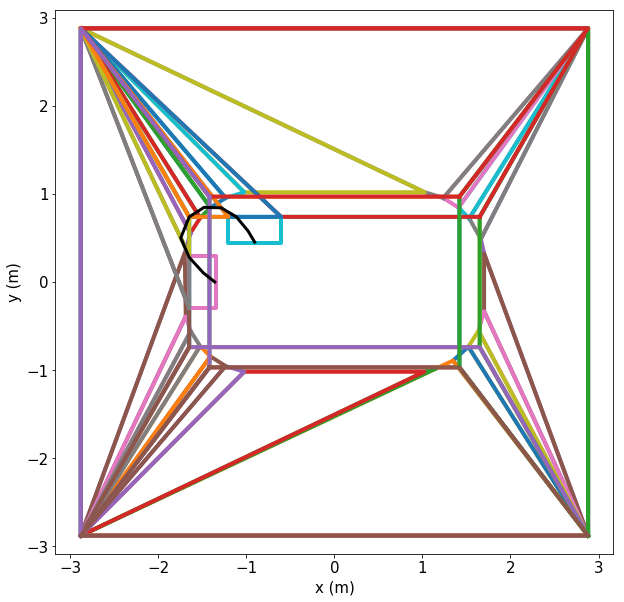

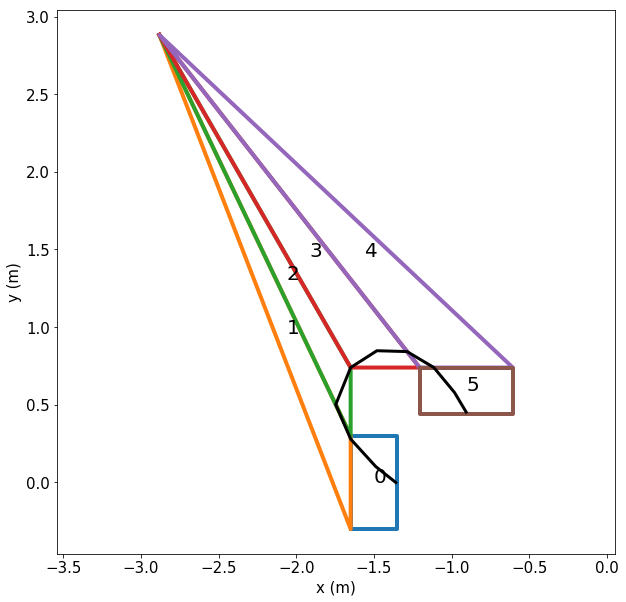

SETTING ENDPOINTS
Calculated C-Space: 0.335553 seconds
Set up graph: 0.240276 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39


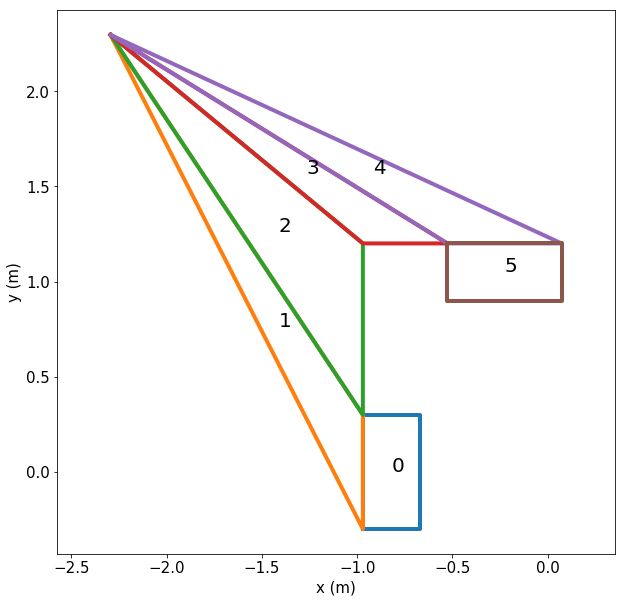

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001692 seconds
ADDING COSTS
Number of costs 2
0.001034 seconds
ADDING CONSTRAINTS
None
Number of constraints 490
0.048482 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.109925 seconds



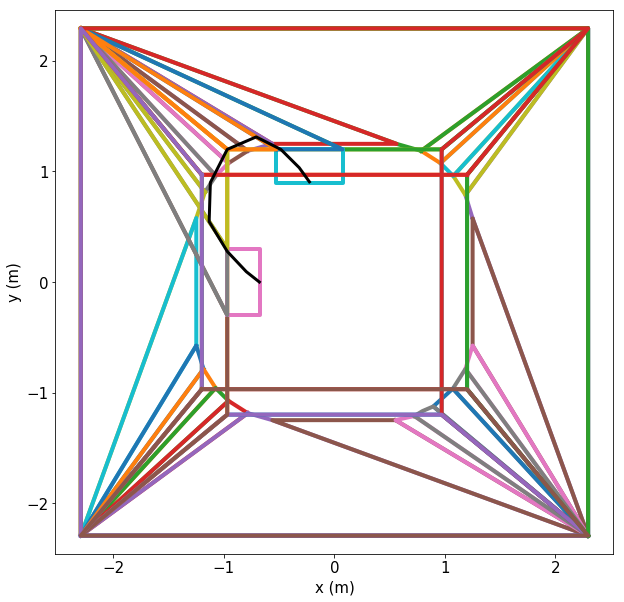

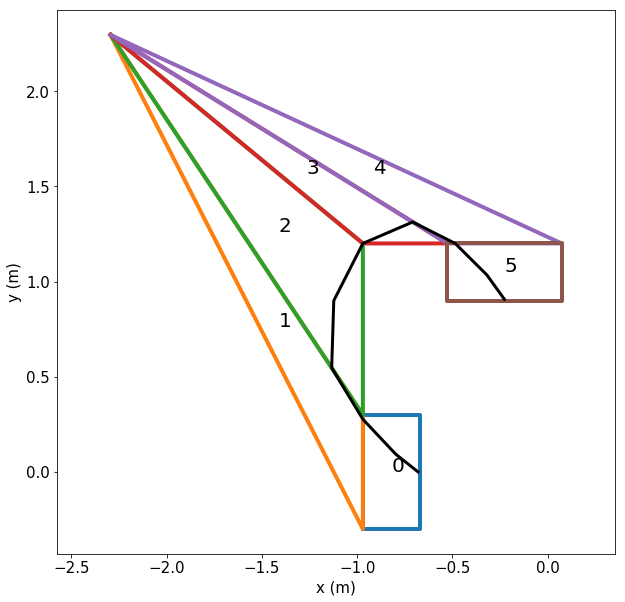

SETTING ENDPOINTS
Calculated C-Space: 0.284039 seconds
Set up graph: 0.231609 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.90625) 0.0
found path endpoint hulls 46 49


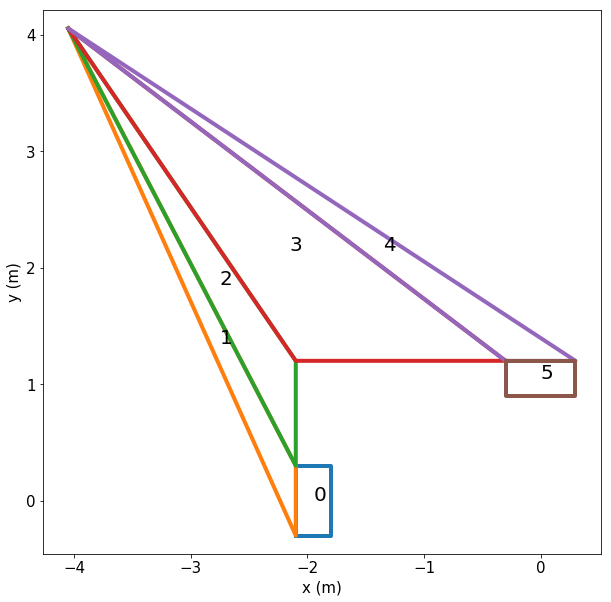

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.001808 seconds
ADDING COSTS
Number of costs 2
0.001627 seconds
ADDING CONSTRAINTS
None
Number of constraints 490
0.043735 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.187784 seconds



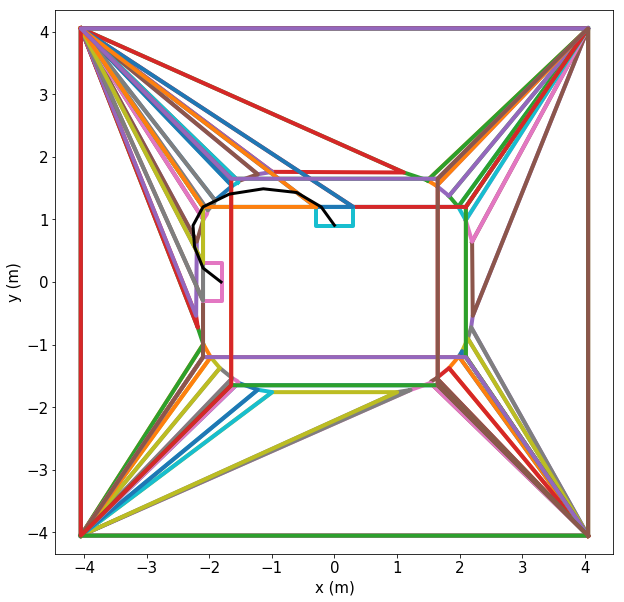

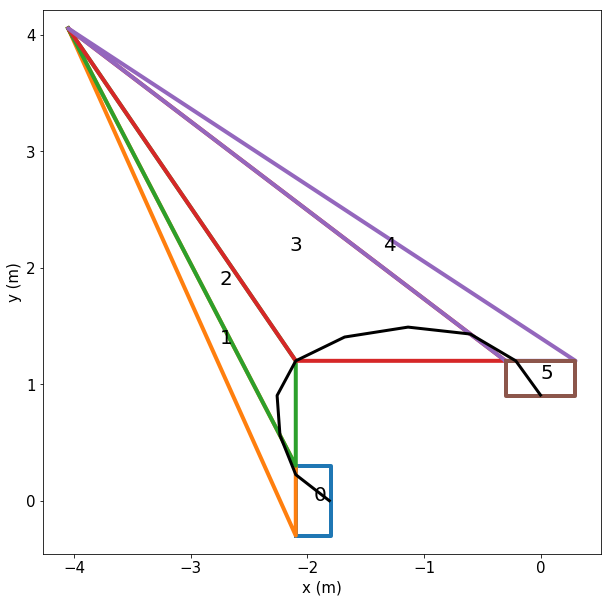

SETTING ENDPOINTS
Calculated C-Space: 0.207582 seconds
Set up graph: 1.270894 seconds
finding_vertex POINT (2.265625 0) 0.0
finding_vertex POINT (0 0.453125) 180.0
found path endpoint hulls 102 87


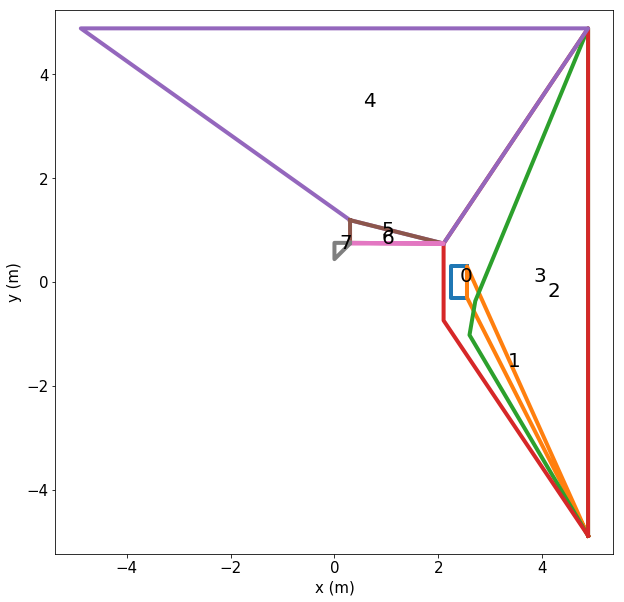

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 186
0.002063 seconds
ADDING COSTS
Number of costs 12
0.006844 seconds
ADDING CONSTRAINTS
None
Number of constraints 1228
0.178194 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.085615 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.181624 seconds
Set up graph: 1.250418 seconds
finding_vertex POINT (2.265625 0) 0.0
finding_vertex POINT (0 0.453125) 180.0
found path endpoint hulls 102 87


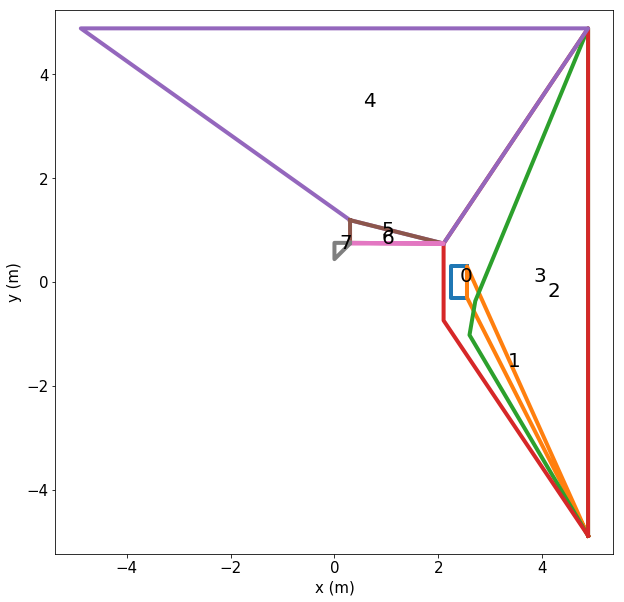

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003135 seconds
ADDING COSTS
Number of costs 11
0.004154 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 34
0.033166 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.023415 seconds

Time Scaling target: 1.000000, result: 1.000000


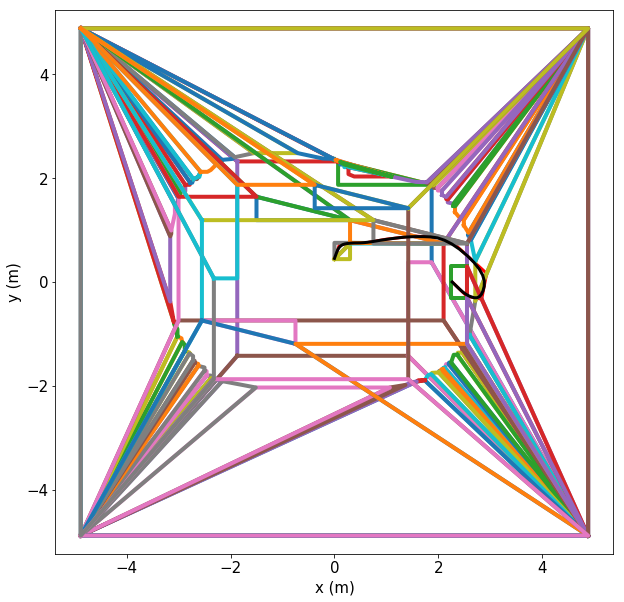

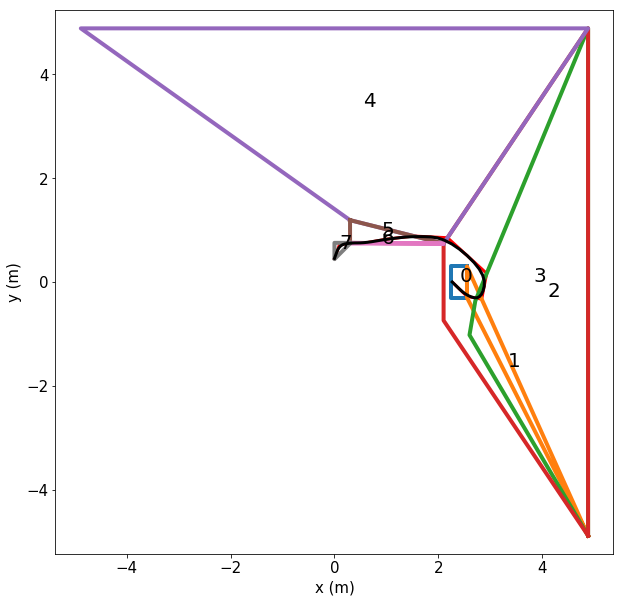

SETTING ENDPOINTS
Calculated C-Space: 0.223263 seconds
Set up graph: 0.203899 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.453125) 0.0
found path endpoint hulls 44 47


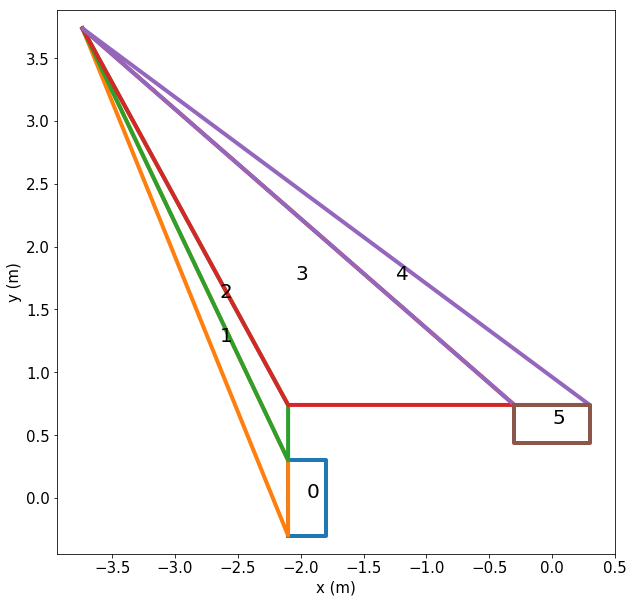

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.003130 seconds
ADDING COSTS
Number of costs 12
0.007133 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.105283 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.201160 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.268861 seconds
Set up graph: 0.204645 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.453125) 0.0
found path endpoint hulls 44 47


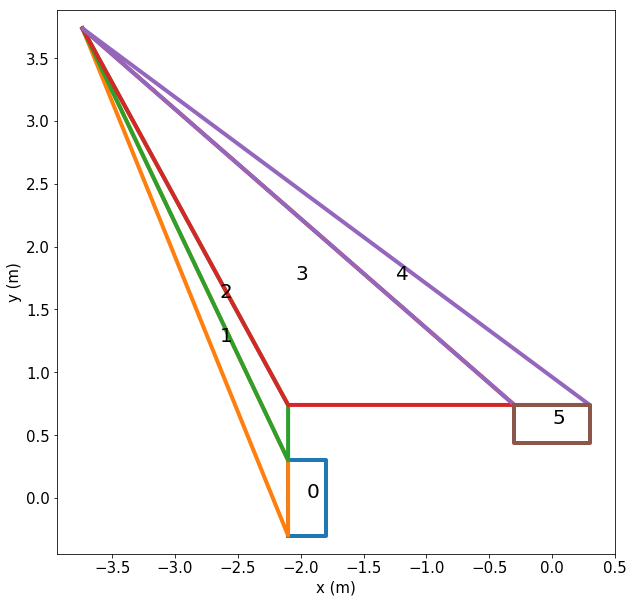

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002759 seconds
ADDING COSTS
Number of costs 11
0.006341 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 32
0.030632 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.024971 seconds

Time Scaling target: 1.000000, result: 1.000000


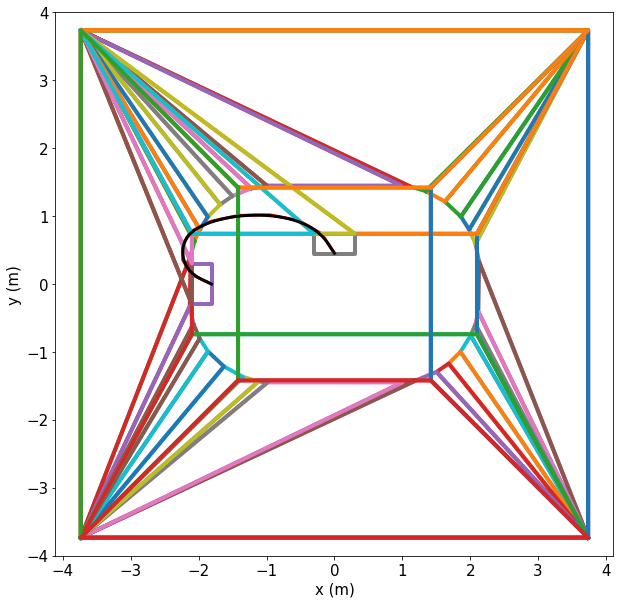

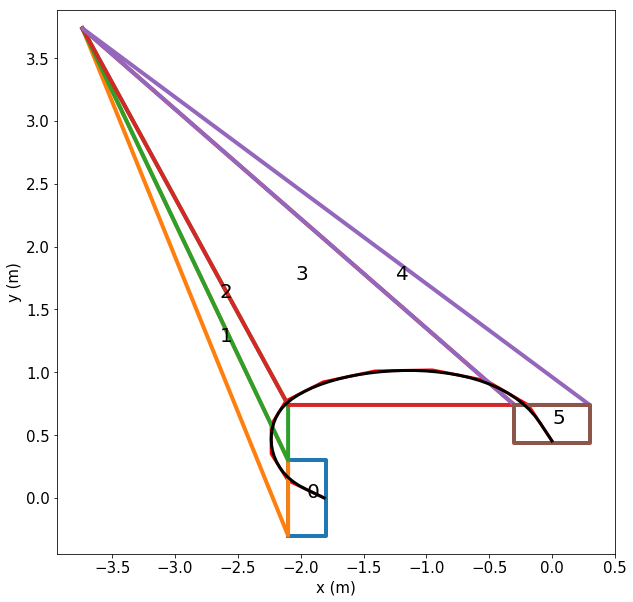

SETTING ENDPOINTS
Calculated C-Space: 0.183785 seconds
Set up graph: 0.167874 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


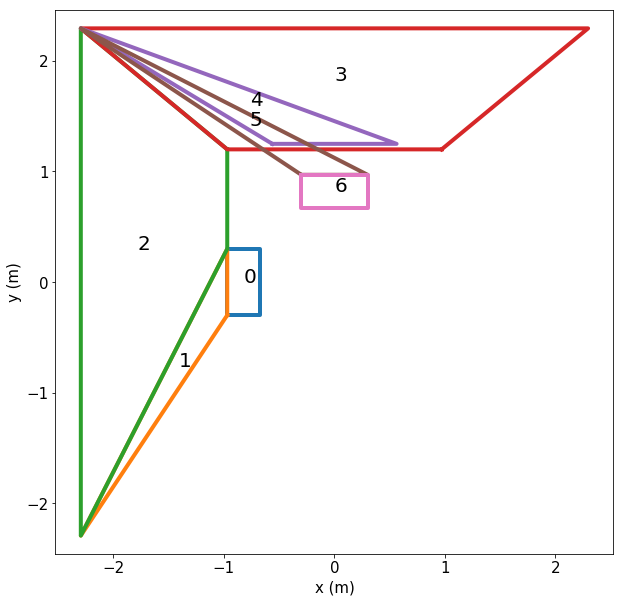

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.008916 seconds
ADDING COSTS
Number of costs 12
0.015741 seconds
ADDING CONSTRAINTS
None
Number of constraints 1058
0.155647 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.258601 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.173891 seconds
Set up graph: 0.167615 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


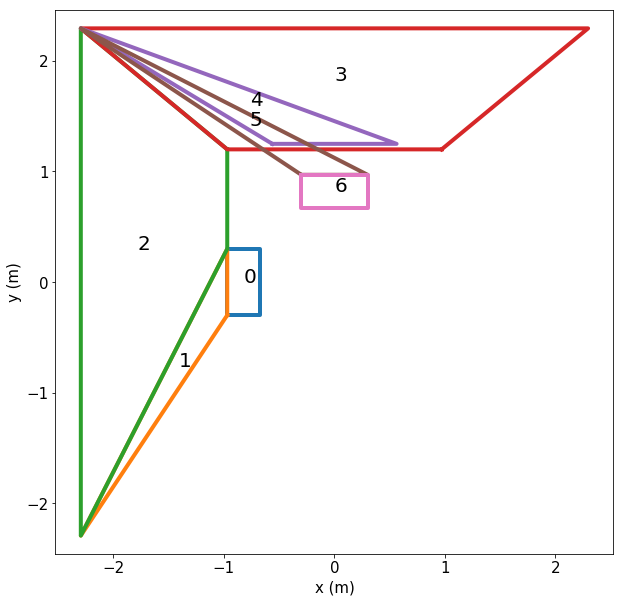

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.011318 seconds
ADDING COSTS
Number of costs 11
0.009925 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.040290 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.026293 seconds

Time Scaling target: 1.000000, result: 1.000000


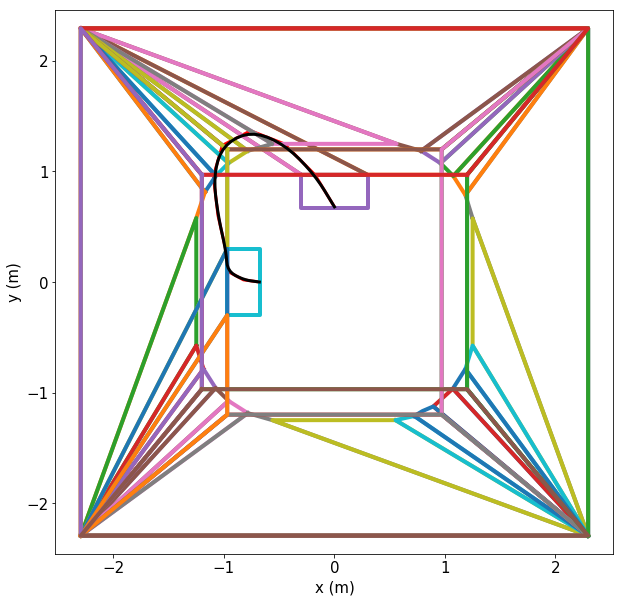

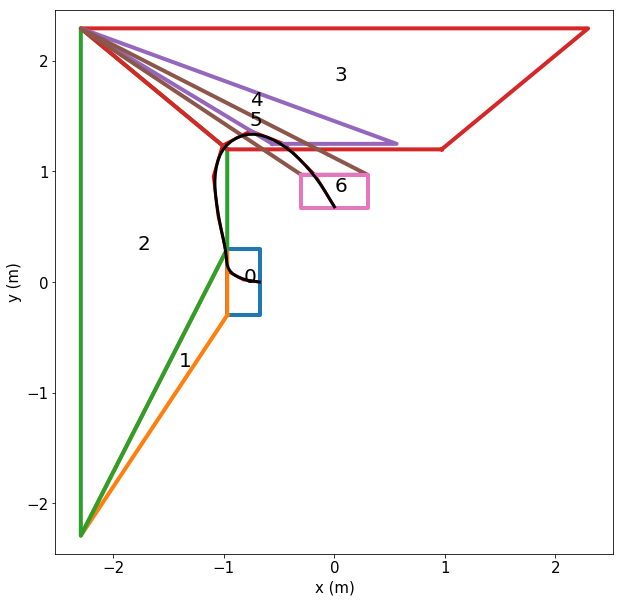

SETTING ENDPOINTS
Calculated C-Space: 0.282478 seconds
Set up graph: 0.248399 seconds
finding_vertex POINT (-2.71875 0) 0.0
finding_vertex POINT (2.71875 0) 0.0
found path endpoint hulls 27 5


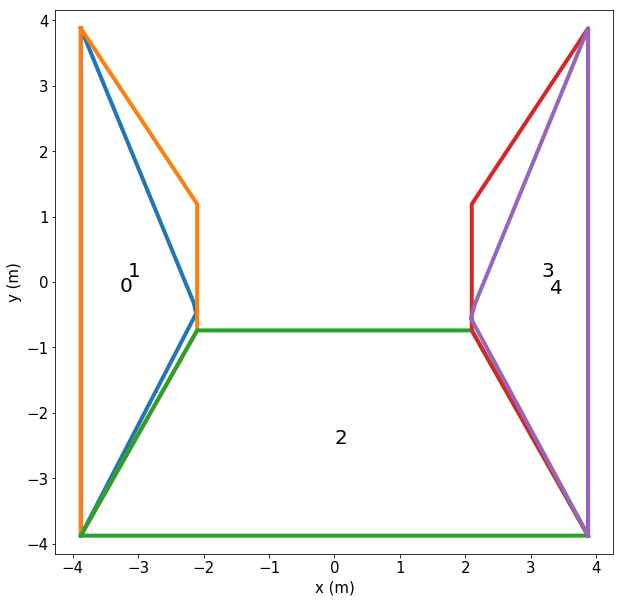

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002631 seconds
ADDING COSTS
Number of costs 12
0.008572 seconds
ADDING CONSTRAINTS
None
Number of constraints 832
0.172013 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.213767 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.219250 seconds
Set up graph: 0.261901 seconds
finding_vertex POINT (-2.71875 0) 0.0
finding_vertex POINT (2.71875 0) 0.0
found path endpoint hulls 27 5


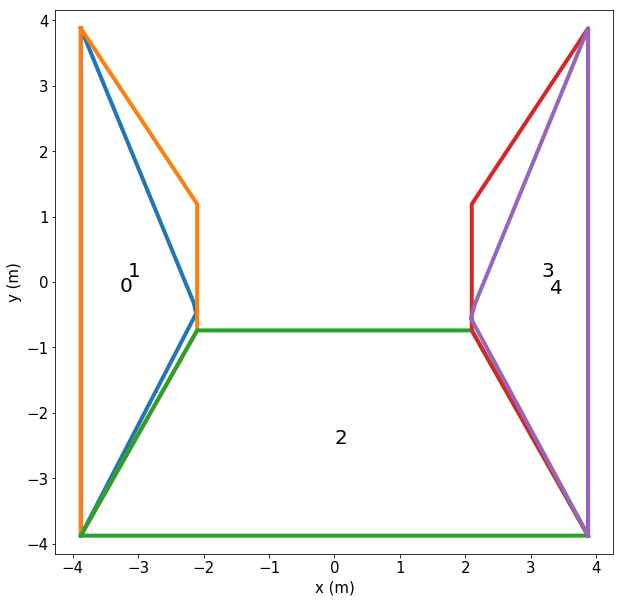

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003473 seconds
ADDING COSTS
Number of costs 11
0.006585 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 44
0.035681 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.026473 seconds

Time Scaling target: 1.000000, result: 1.000000


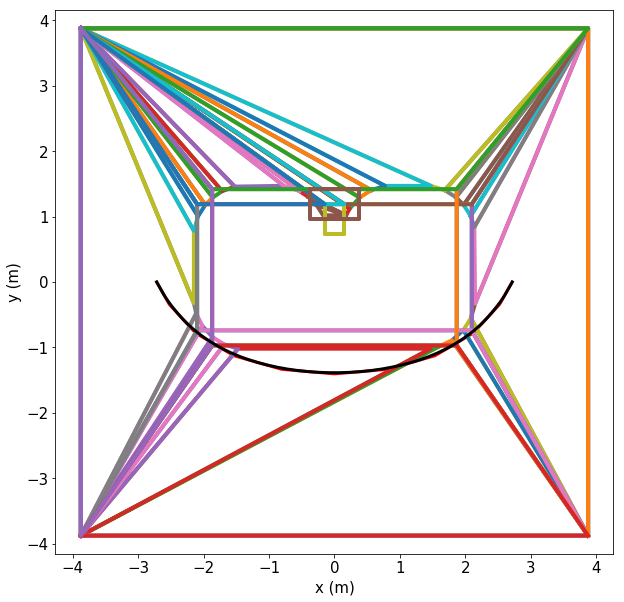

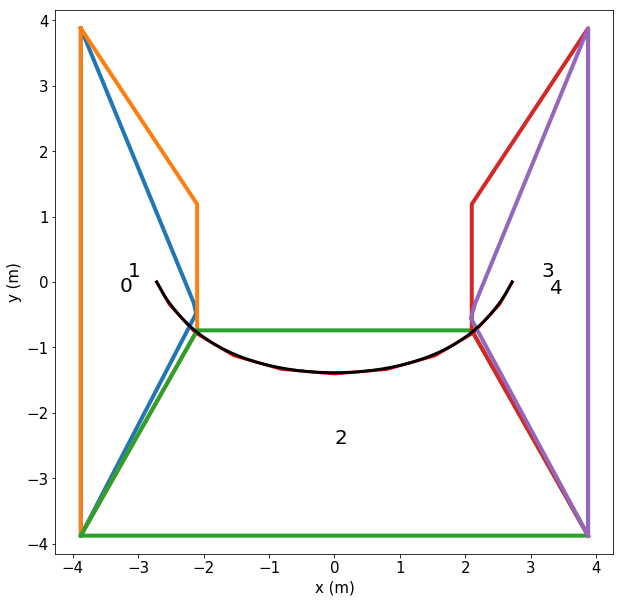

SETTING ENDPOINTS
Calculated C-Space: 0.290731 seconds
Set up graph: 0.199327 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (-1.1328125 0.6796875) 90.0
found path endpoint hulls 47 4


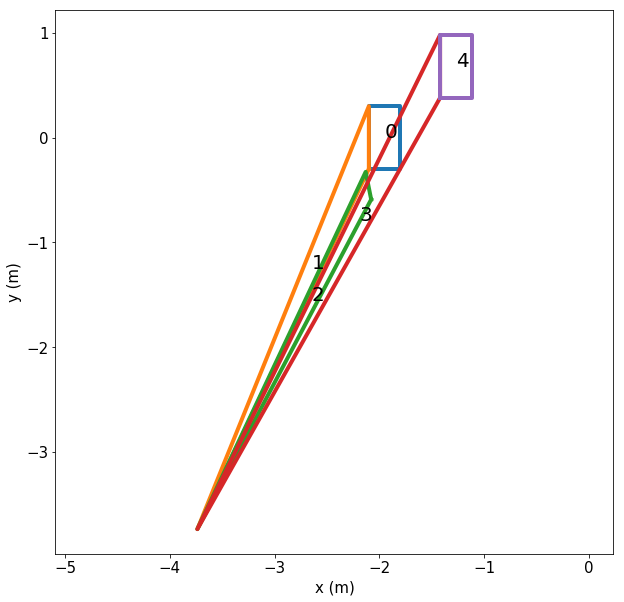

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.004144 seconds
ADDING COSTS
Number of costs 12
0.015342 seconds
ADDING CONSTRAINTS
None
Number of constraints 718
0.101128 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.194189 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.205775 seconds
Set up graph: 0.200033 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (-1.1328125 0.6796875) 90.0
found path endpoint hulls 47 4


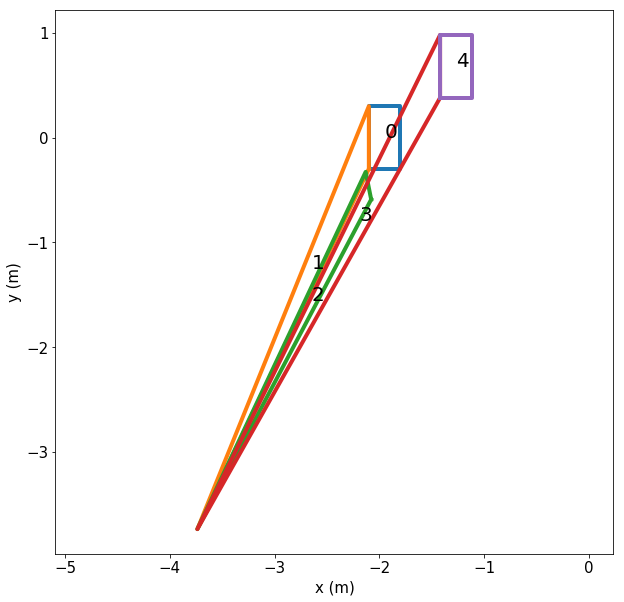

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.006436 seconds
ADDING COSTS
Number of costs 11
0.008585 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 26
0.036448 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.032188 seconds

Time Scaling target: 1.000000, result: 1.000000


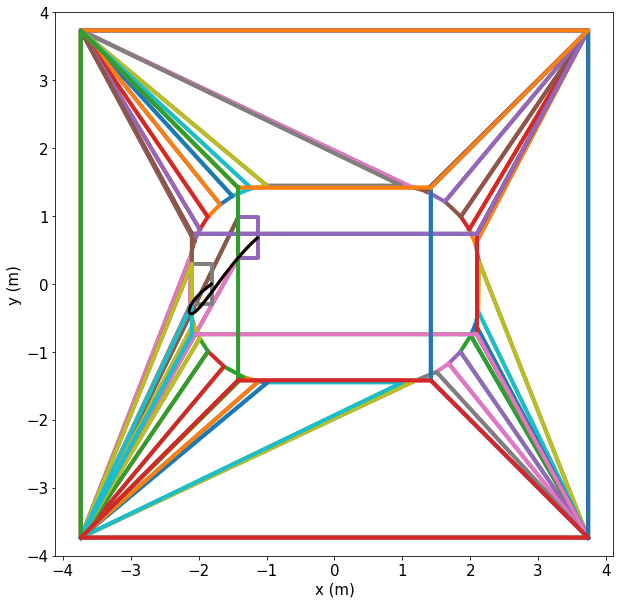

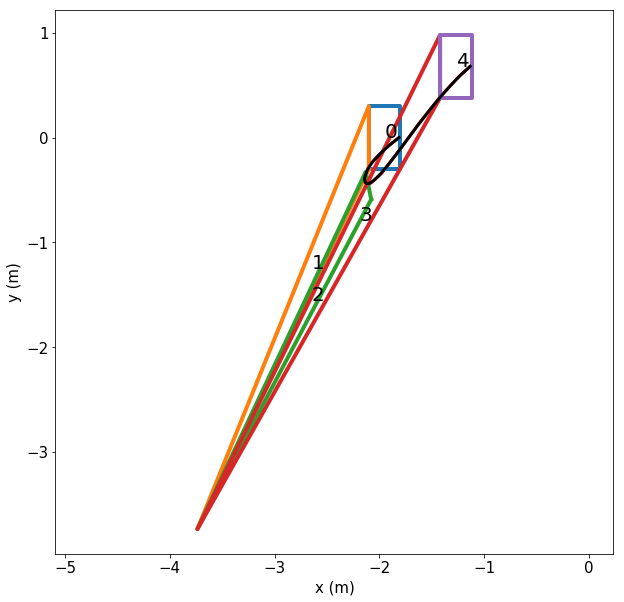

SETTING ENDPOINTS
Calculated C-Space: 0.362593 seconds
Set up graph: 0.552289 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (0 -0.453125) 180.0
found path endpoint hulls 70 66


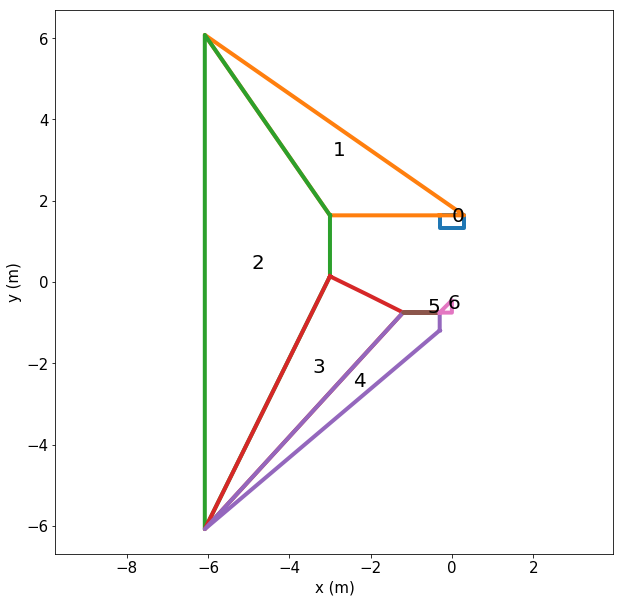

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.003446 seconds
ADDING COSTS
Number of costs 12
0.007627 seconds
ADDING CONSTRAINTS
None
Number of constraints 1134
0.173681 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.043510 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.357820 seconds
Set up graph: 0.555309 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (0 -0.453125) 180.0
found path endpoint hulls 70 66


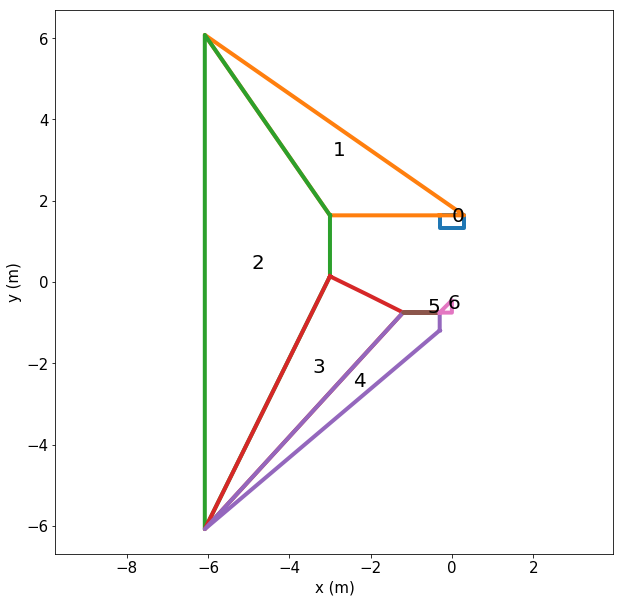

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002608 seconds
ADDING COSTS
Number of costs 11
0.010418 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 42
0.052148 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.027018 seconds

Time Scaling target: 1.000000, result: 1.000000


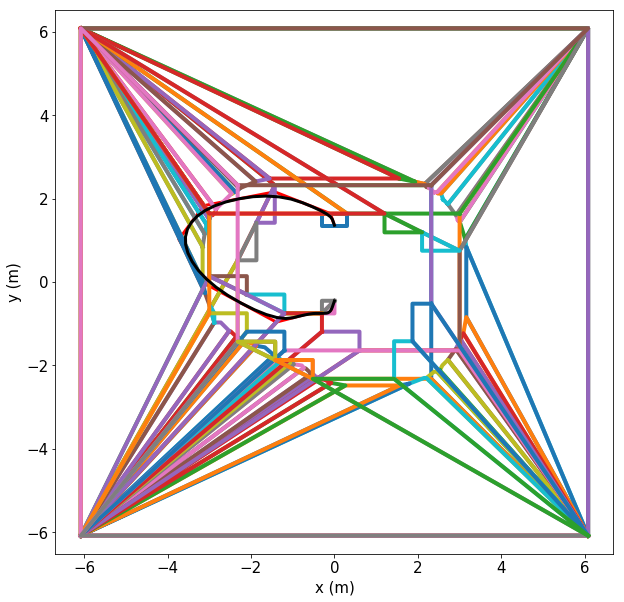

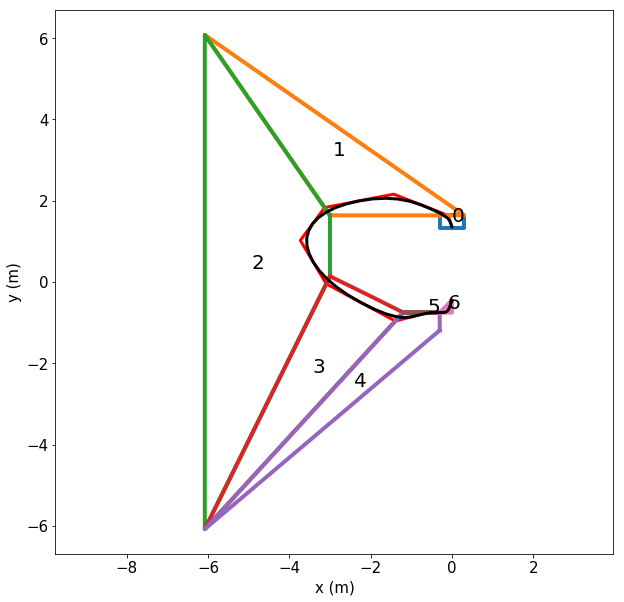

SETTING ENDPOINTS
Calculated C-Space: 0.185757 seconds
Set up graph: 0.188661 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (0.453125 0.453125) 0.0
found path endpoint hulls 39 43


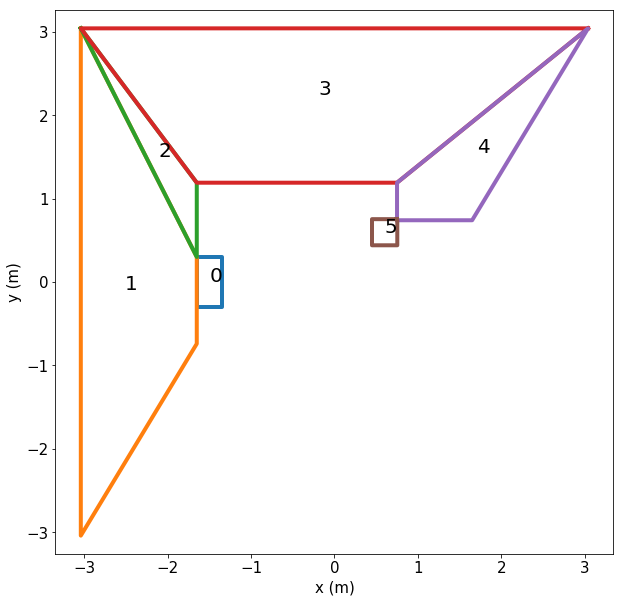

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002766 seconds
ADDING COSTS
Number of costs 12
0.007078 seconds
ADDING CONSTRAINTS
None
Number of constraints 1078
0.151002 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.101274 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.181587 seconds
Set up graph: 0.183977 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (0.453125 0.453125) 0.0
found path endpoint hulls 39 43


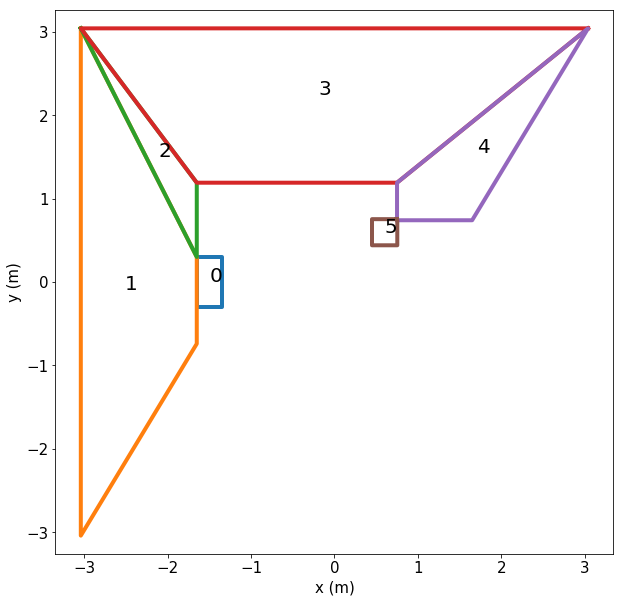

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002634 seconds
ADDING COSTS
Number of costs 11
0.006372 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 46
0.055703 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.024067 seconds

Time Scaling target: 1.000000, result: 1.000000


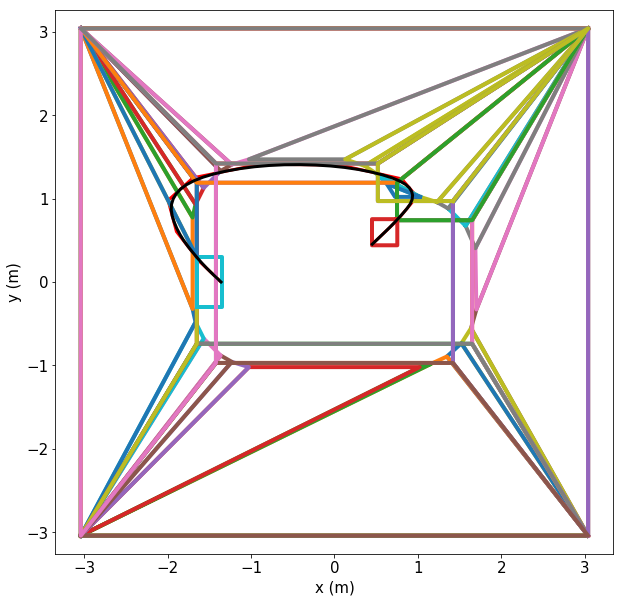

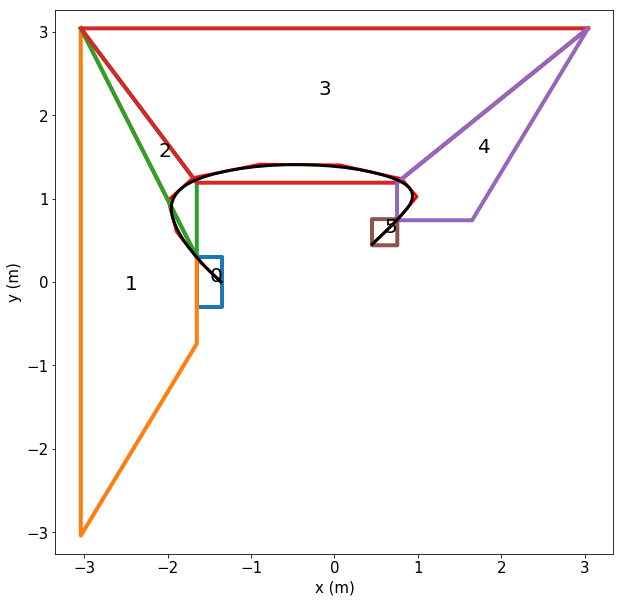

SETTING ENDPOINTS
Calculated C-Space: 0.177050 seconds
Set up graph: 0.166033 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (-0.90625 0.453125) 0.0
found path endpoint hulls 36 39


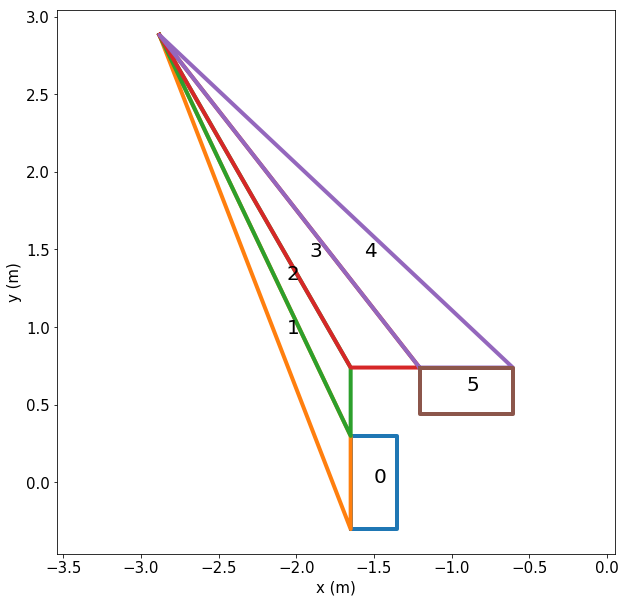

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.006185 seconds
ADDING COSTS
Number of costs 12
0.012855 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.116475 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.228574 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.160862 seconds
Set up graph: 0.180658 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (-0.90625 0.453125) 0.0
found path endpoint hulls 36 39


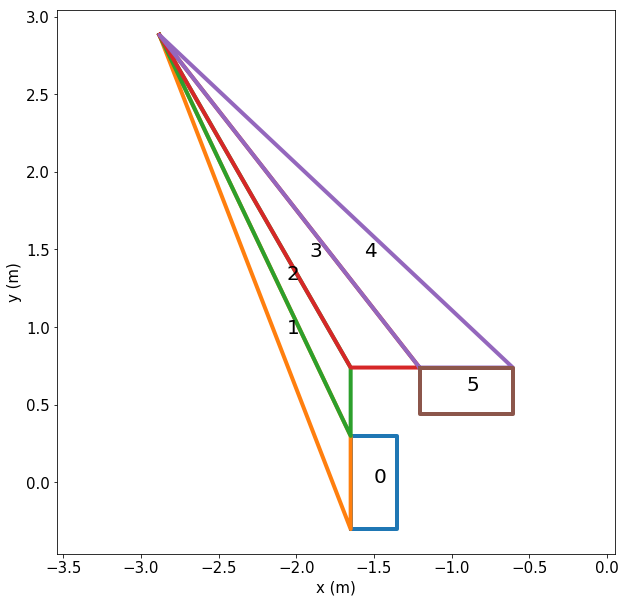

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002212 seconds
ADDING COSTS
Number of costs 11
0.005253 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 24
0.047018 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.037131 seconds

Time Scaling target: 1.000000, result: 1.000000


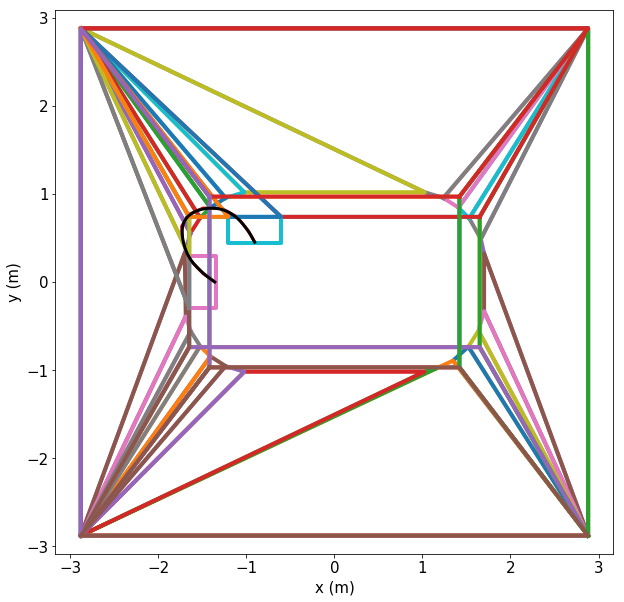

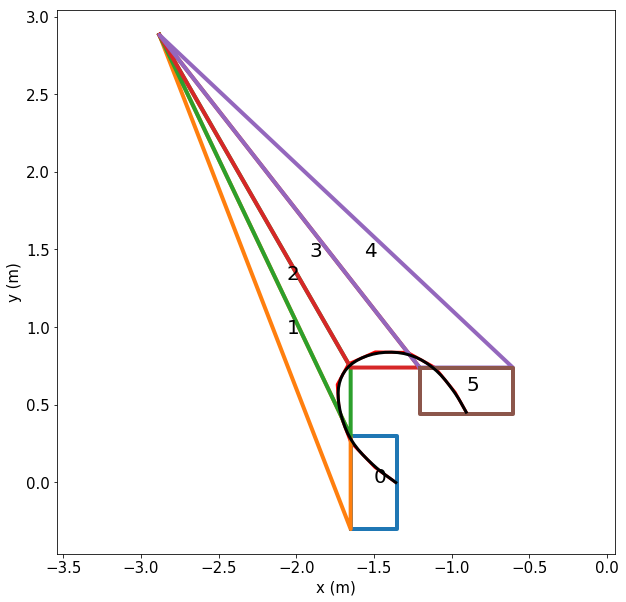

SETTING ENDPOINTS
Calculated C-Space: 0.177175 seconds
Set up graph: 0.176640 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39


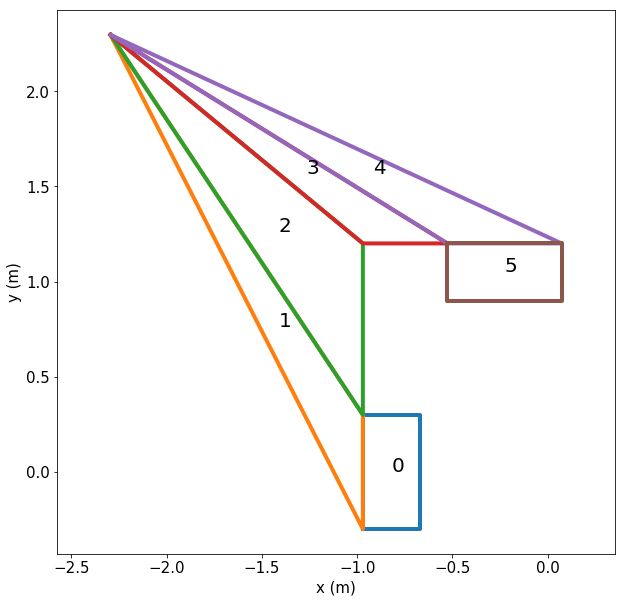

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002881 seconds
ADDING COSTS
Number of costs 12
0.016340 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.132783 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.238208 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.170258 seconds
Set up graph: 0.176784 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39


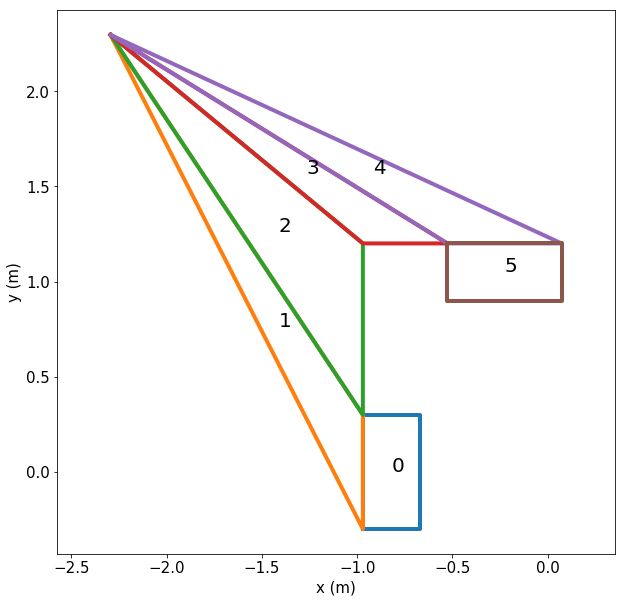

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.001758 seconds
ADDING COSTS
Number of costs 11
0.006743 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.042789 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.029247 seconds

Time Scaling target: 1.000000, result: 1.000000


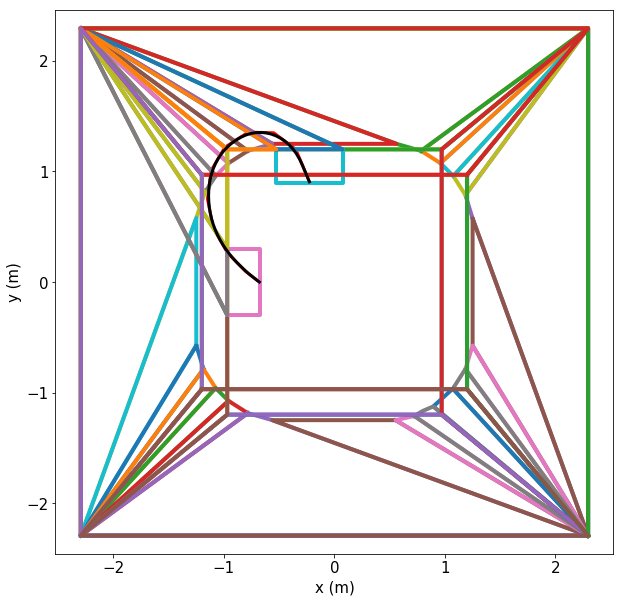

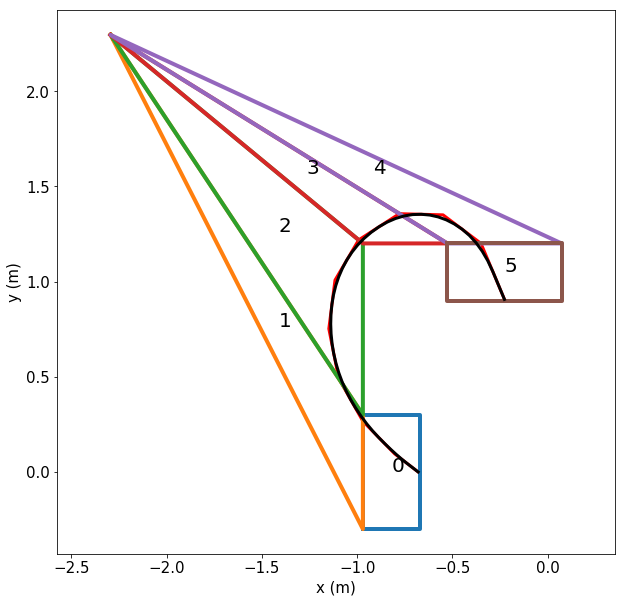

SETTING ENDPOINTS
Calculated C-Space: 0.272705 seconds
Set up graph: 0.248246 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.90625) 0.0
found path endpoint hulls 46 49


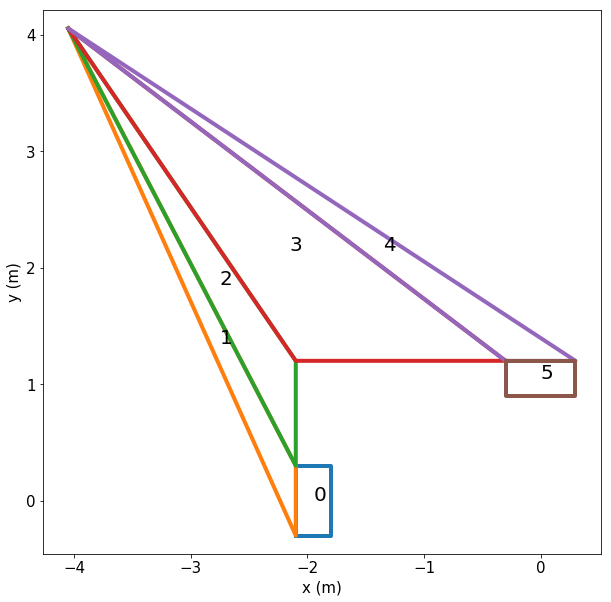

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.005947 seconds
ADDING COSTS
Number of costs 12
0.012195 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.114648 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.230613 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.372330 seconds
Set up graph: 0.254811 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.90625) 0.0
found path endpoint hulls 46 49


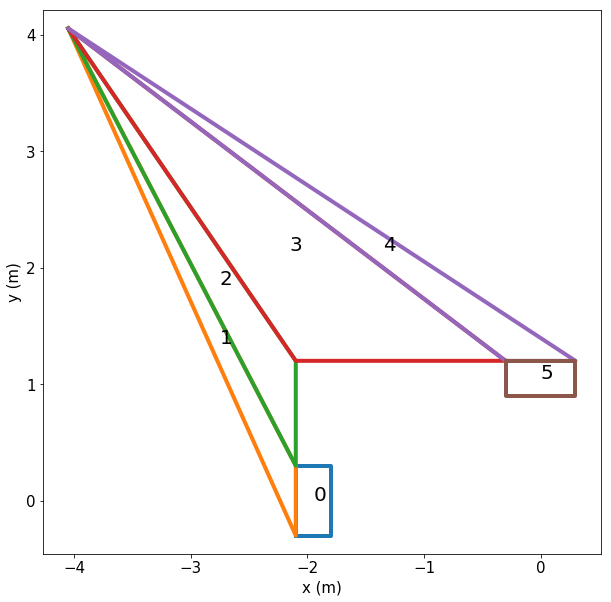

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.002907 seconds
ADDING COSTS
Number of costs 11
0.006135 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.044754 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.033101 seconds

Time Scaling target: 1.000000, result: 1.000000


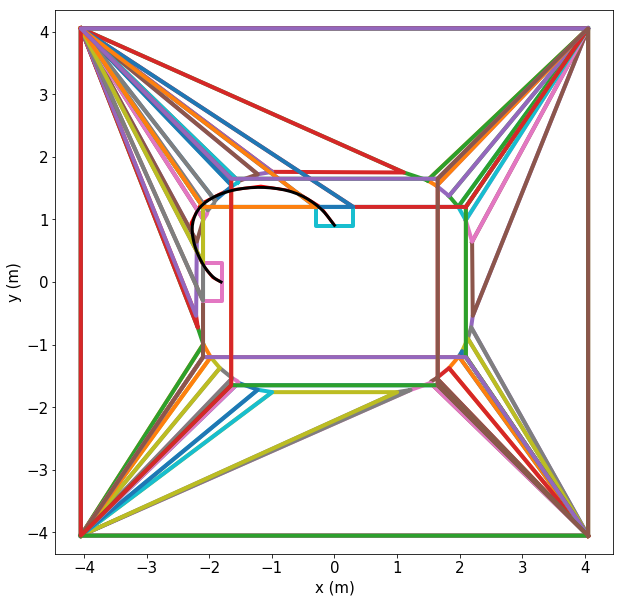

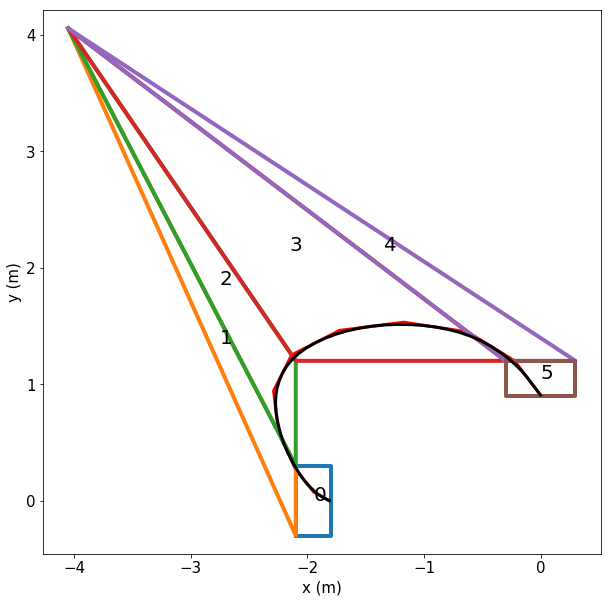

SETTING ENDPOINTS
Calculated C-Space: 0.159810 seconds
Set up graph: 0.669866 seconds
finding_vertex POINT (2.265625 0) 0.0
finding_vertex POINT (0 0.453125) 180.0
found path endpoint hulls 102 87


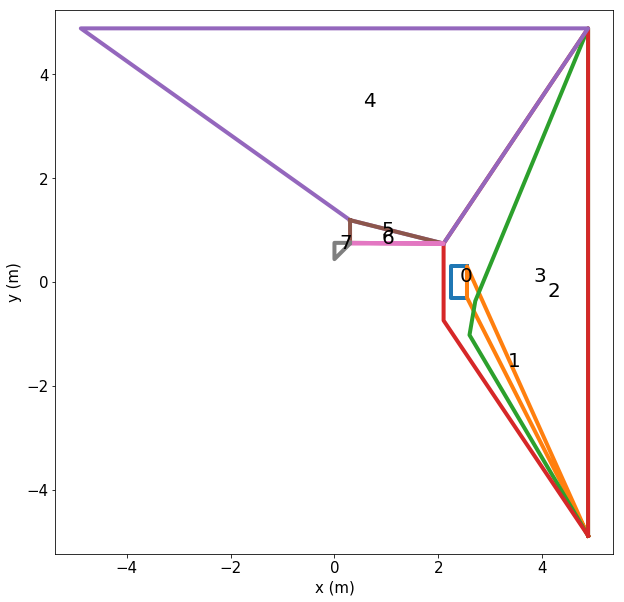

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 186
0.012135 seconds
ADDING COSTS
Number of costs 12
0.007832 seconds
ADDING CONSTRAINTS
None
Number of constraints 1228
0.180636 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.058032 seconds

Time Scaling target: 1.000000, result: 1.000000


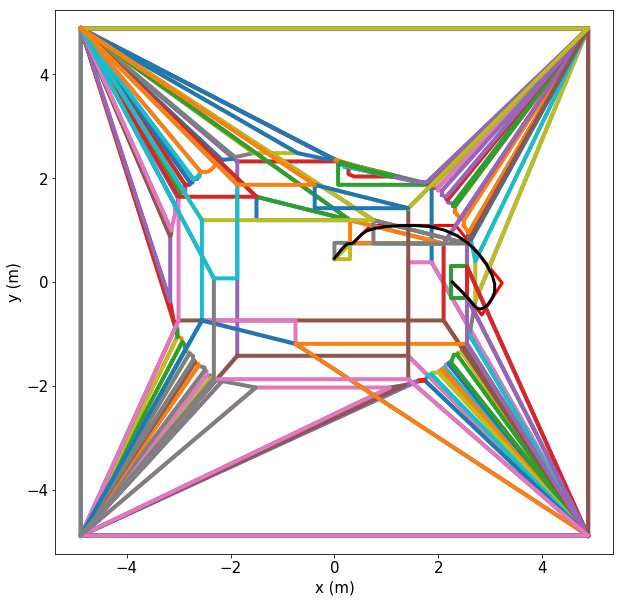

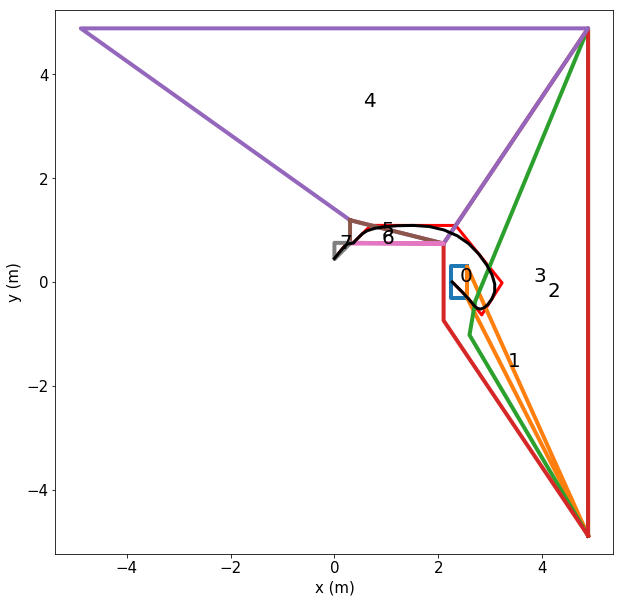

SETTING ENDPOINTS
Calculated C-Space: 0.203988 seconds
Set up graph: 0.223773 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.453125) 0.0
found path endpoint hulls 44 47


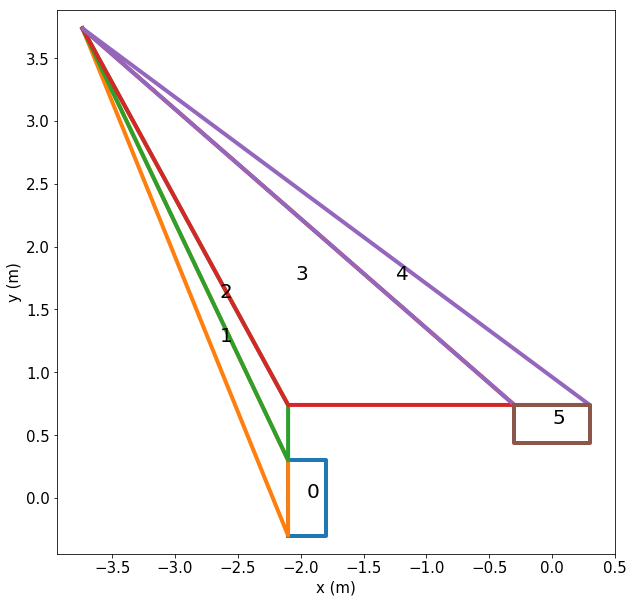

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002837 seconds
ADDING COSTS
Number of costs 12
0.012225 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.113441 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.202821 seconds

Time Scaling target: 1.000000, result: 1.000000


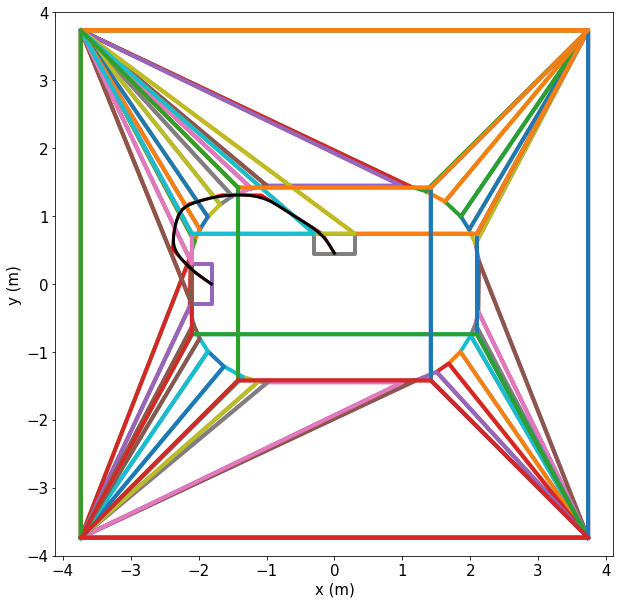

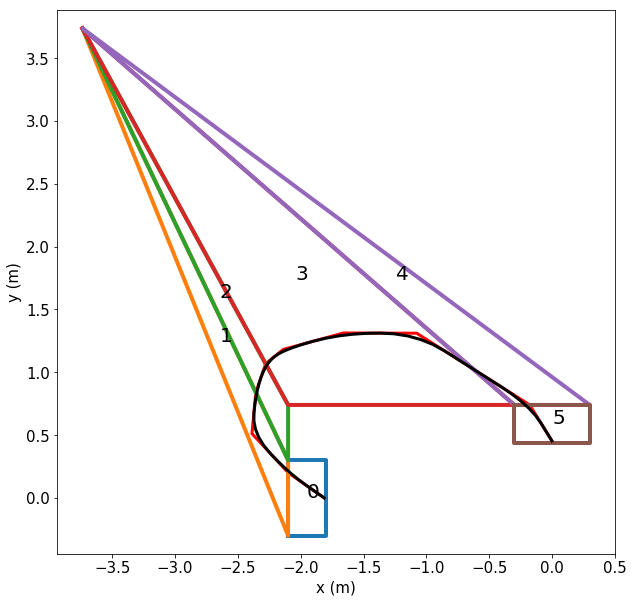

SETTING ENDPOINTS
Calculated C-Space: 0.171868 seconds
Set up graph: 0.174605 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 39 4


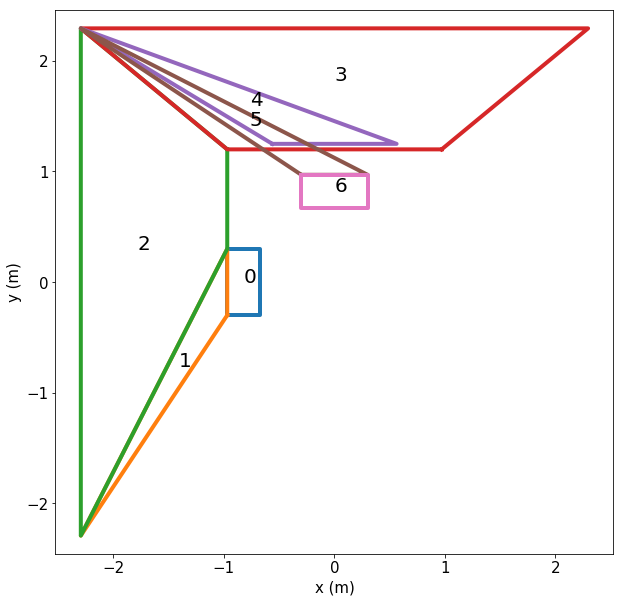

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.003171 seconds
ADDING COSTS
Number of costs 12
0.007094 seconds
ADDING CONSTRAINTS
None
Number of constraints 1058
0.148157 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.130089 seconds

Time Scaling target: 1.000000, result: 1.000000


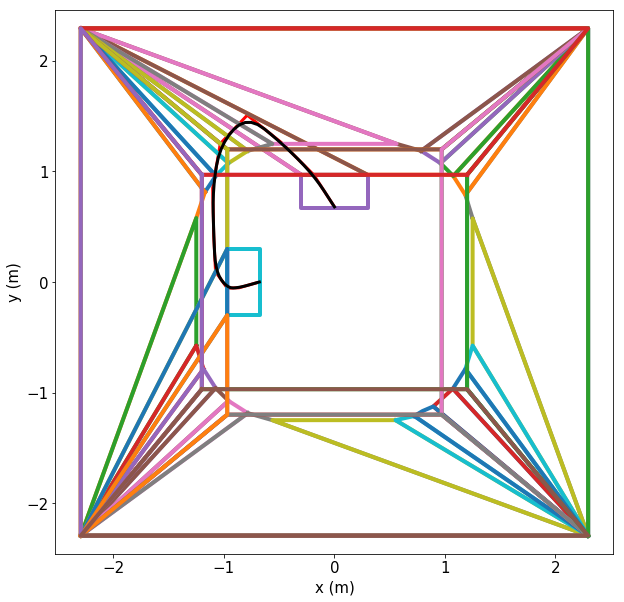

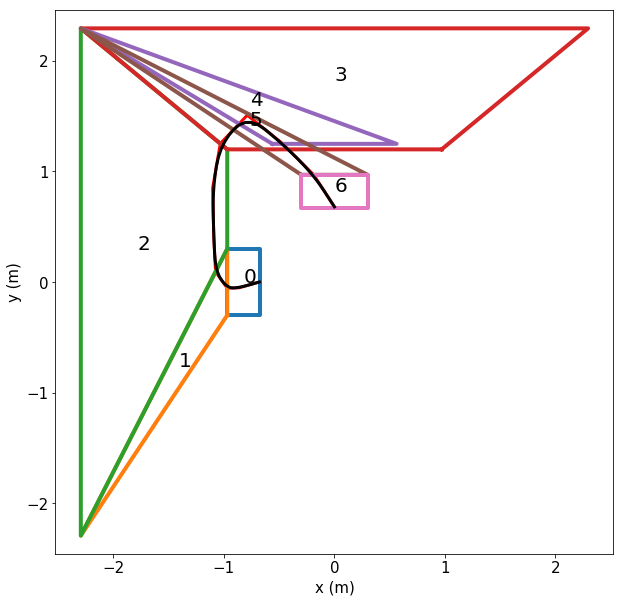

SETTING ENDPOINTS
Calculated C-Space: 0.222695 seconds
Set up graph: 0.247564 seconds
finding_vertex POINT (-2.71875 0) 0.0
finding_vertex POINT (2.71875 0) 0.0
found path endpoint hulls 27 5


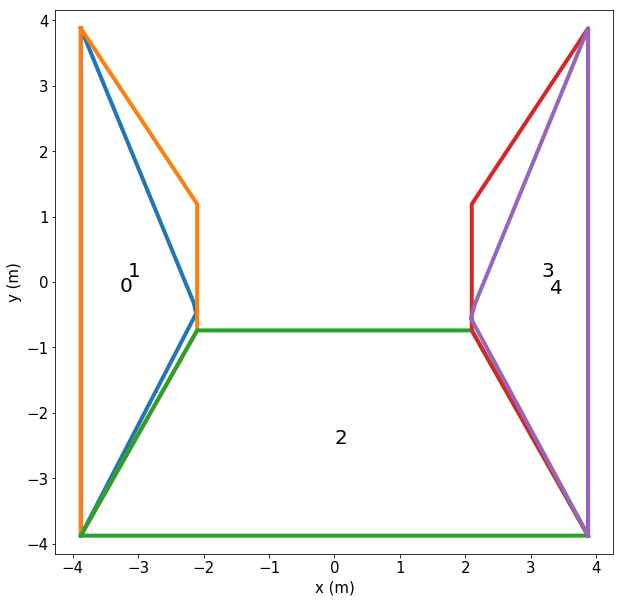

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002624 seconds
ADDING COSTS
Number of costs 12
0.007228 seconds
ADDING CONSTRAINTS
None
Number of constraints 832
0.123537 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.172443 seconds

Time Scaling target: 1.000000, result: 1.000000


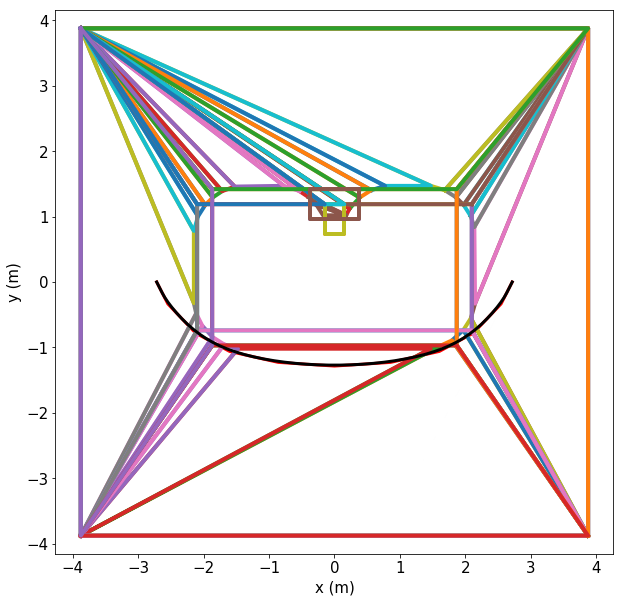

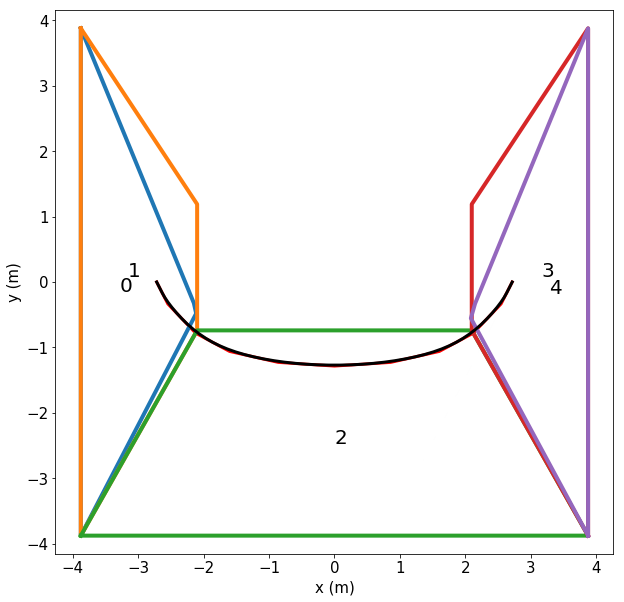

SETTING ENDPOINTS
Calculated C-Space: 0.196993 seconds
Set up graph: 0.218586 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (-1.1328125 0.6796875) 90.0
found path endpoint hulls 47 4


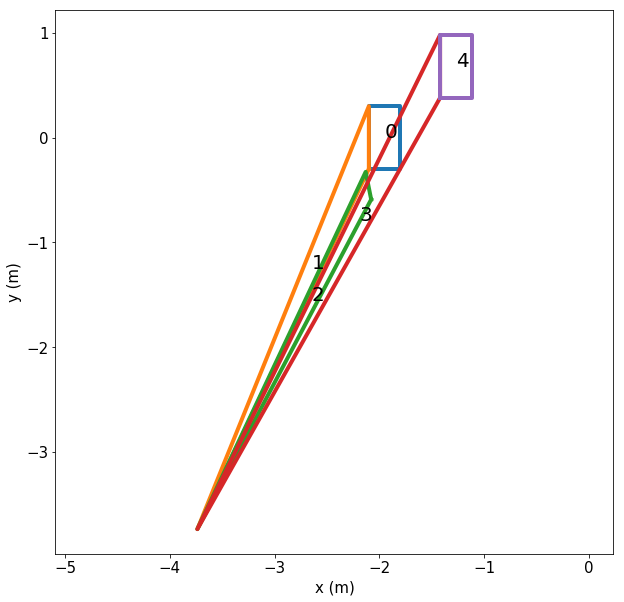

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002607 seconds
ADDING COSTS
Number of costs 12
0.006904 seconds
ADDING CONSTRAINTS
None
Number of constraints 718
0.102566 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.182369 seconds

Time Scaling target: 1.000000, result: 1.000000


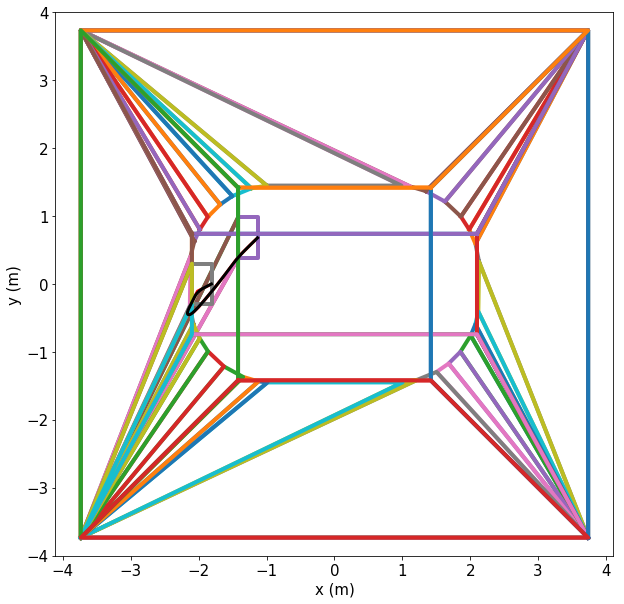

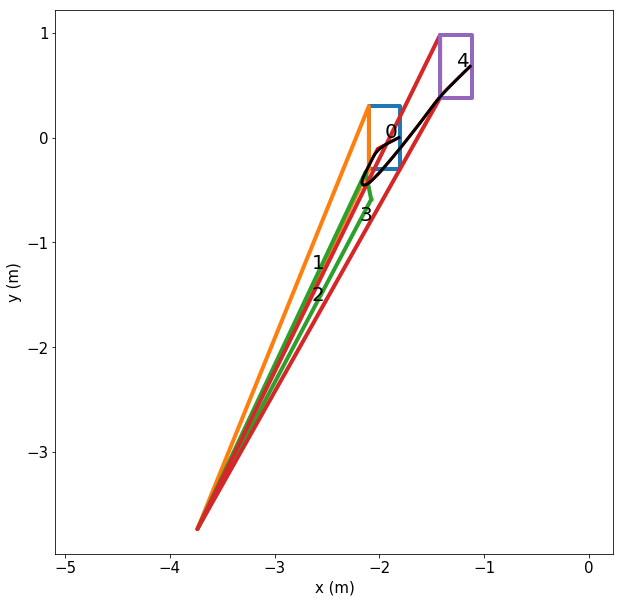

SETTING ENDPOINTS
Calculated C-Space: 0.359111 seconds
Set up graph: 0.550174 seconds
finding_vertex POINT (0 1.359375) 180.0
finding_vertex POINT (0 -0.453125) 180.0
found path endpoint hulls 70 66


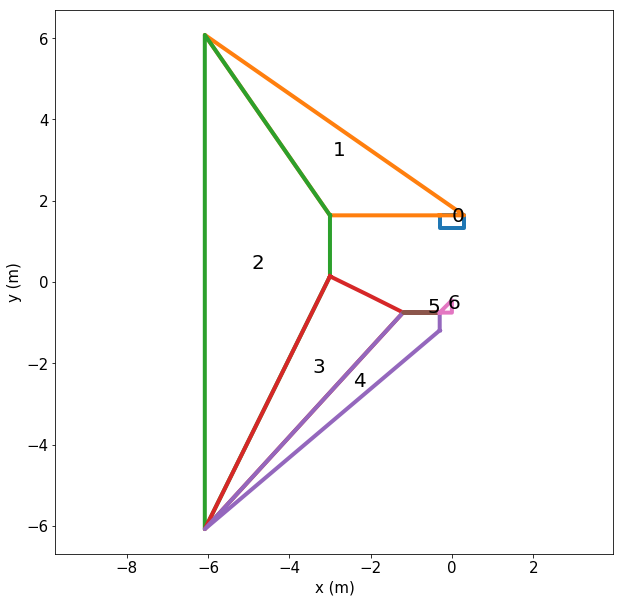

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 176
0.002638 seconds
ADDING COSTS
Number of costs 12
0.007131 seconds
ADDING CONSTRAINTS
None
Number of constraints 1134
0.171589 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.043988 seconds

Time Scaling target: 1.000000, result: 1.000000


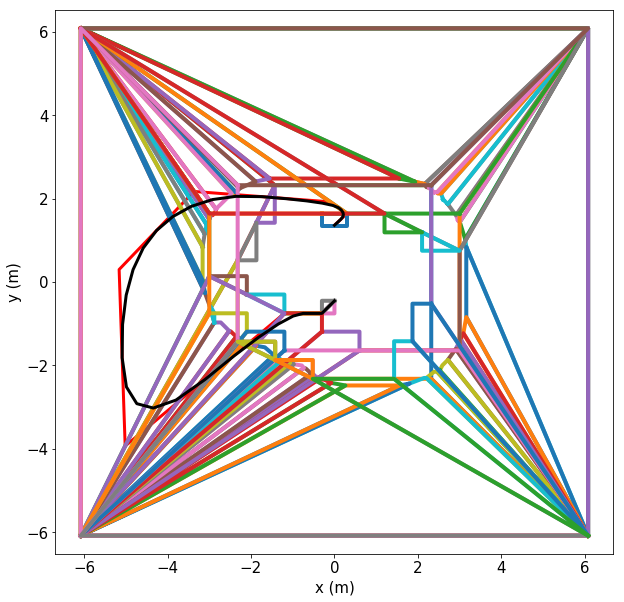

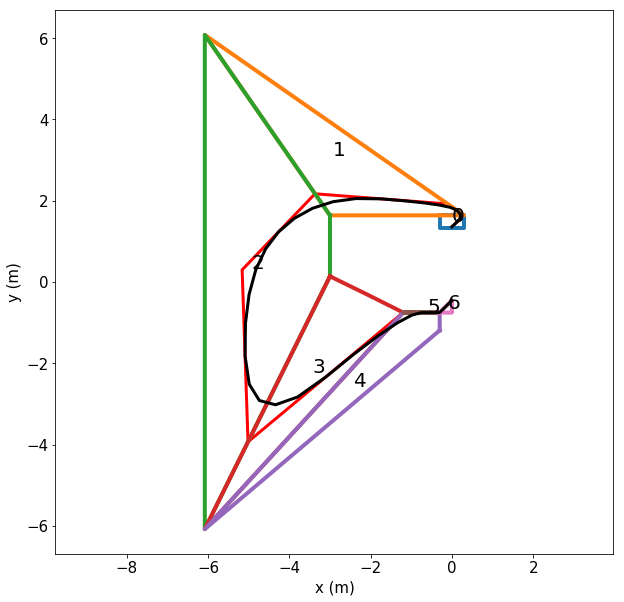

SETTING ENDPOINTS
Calculated C-Space: 0.190594 seconds
Set up graph: 0.191747 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (0.453125 0.453125) 0.0
found path endpoint hulls 39 43


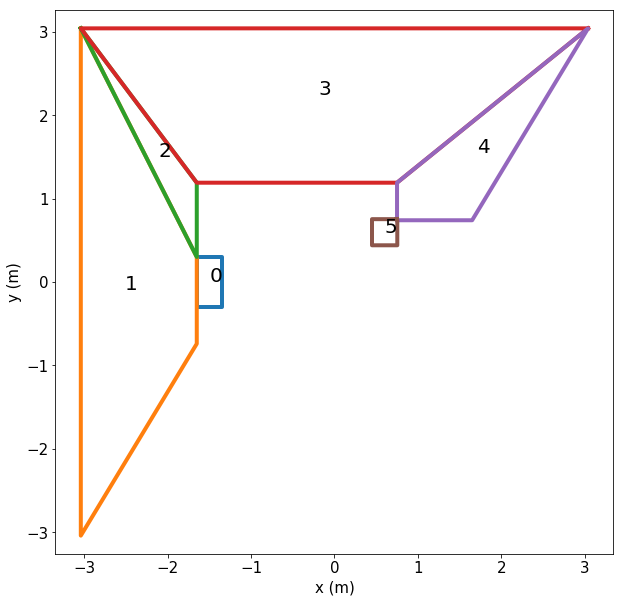

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.004578 seconds
ADDING COSTS
Number of costs 12
0.011565 seconds
ADDING CONSTRAINTS
None
Number of constraints 1078
0.146206 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.105808 seconds

Time Scaling target: 1.000000, result: 1.000000


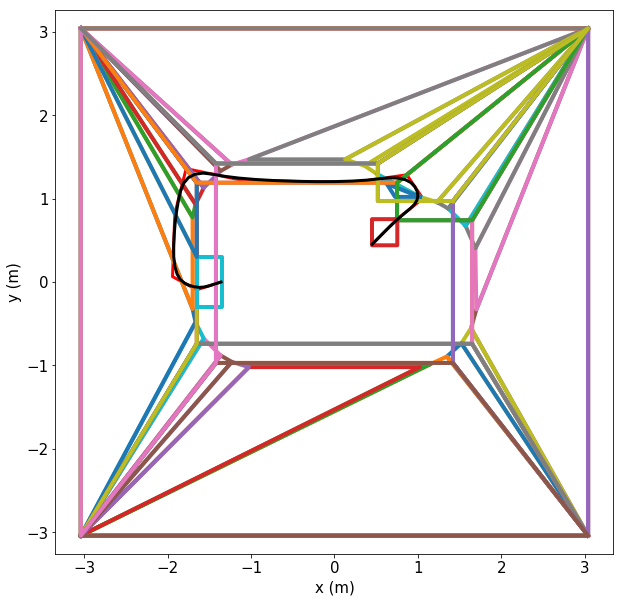

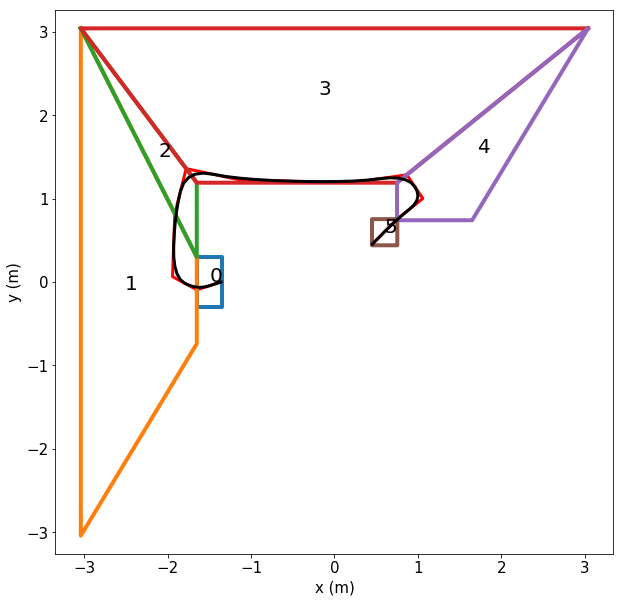

SETTING ENDPOINTS
Calculated C-Space: 0.166207 seconds
Set up graph: 0.174222 seconds
finding_vertex POINT (-1.359375 0) 0.0
finding_vertex POINT (-0.90625 0.453125) 0.0
found path endpoint hulls 36 39


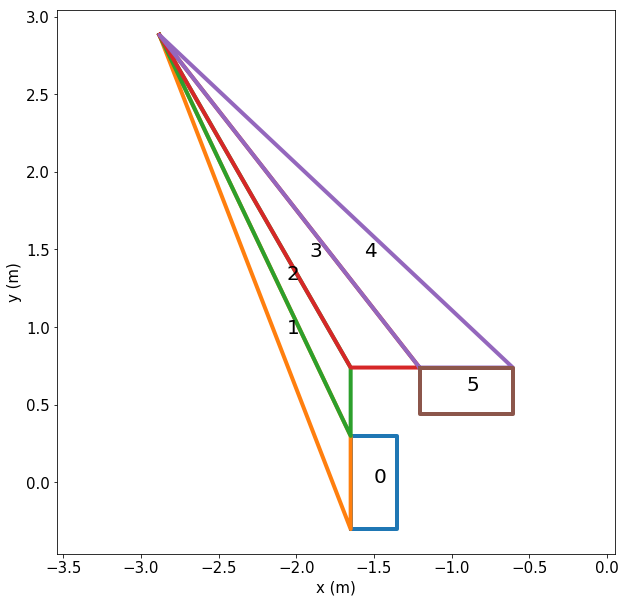

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002964 seconds
ADDING COSTS
Number of costs 12
0.007339 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.124701 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.232754 seconds

Time Scaling target: 1.000000, result: 1.000000


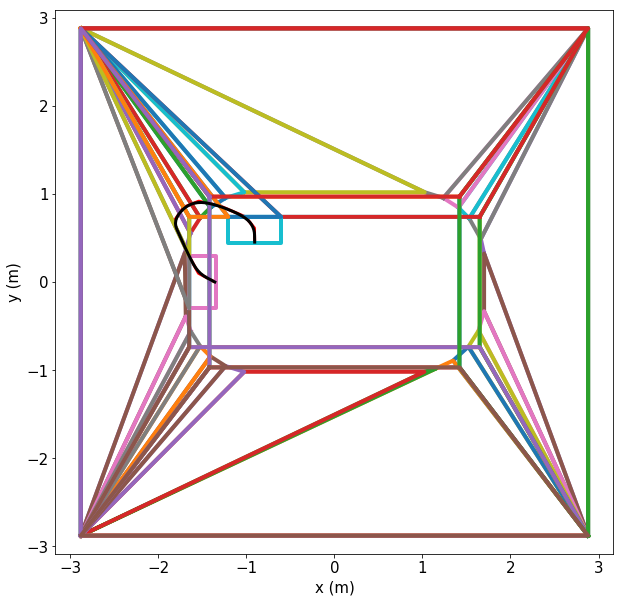

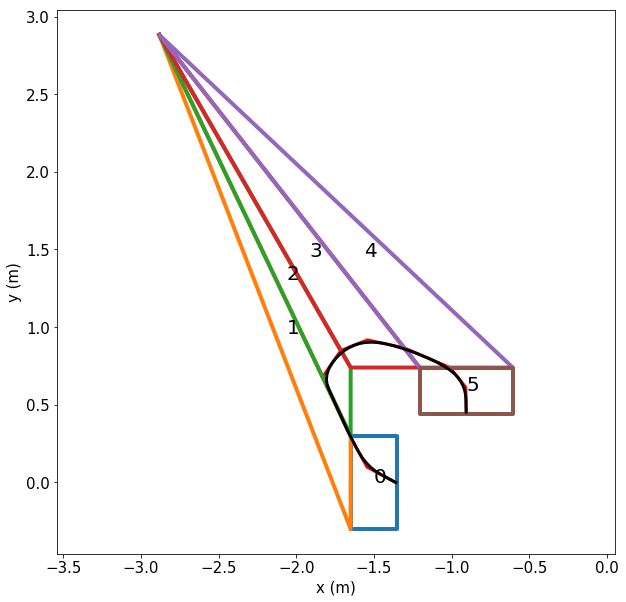

SETTING ENDPOINTS
Calculated C-Space: 0.176242 seconds
Set up graph: 0.172105 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 36 39


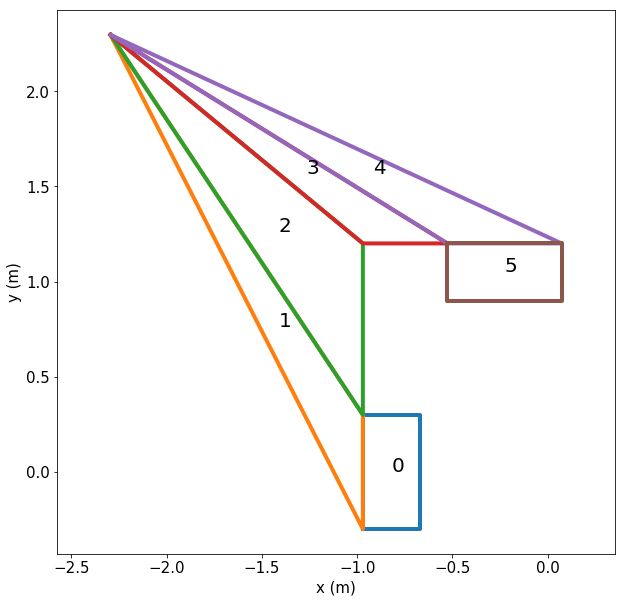

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.006113 seconds
ADDING COSTS
Number of costs 12
0.014782 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.111021 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.251349 seconds

Time Scaling target: 1.000000, result: 1.000000


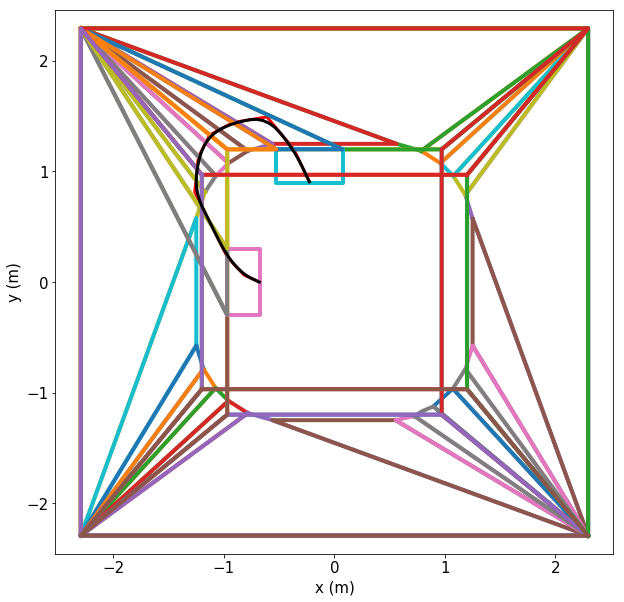

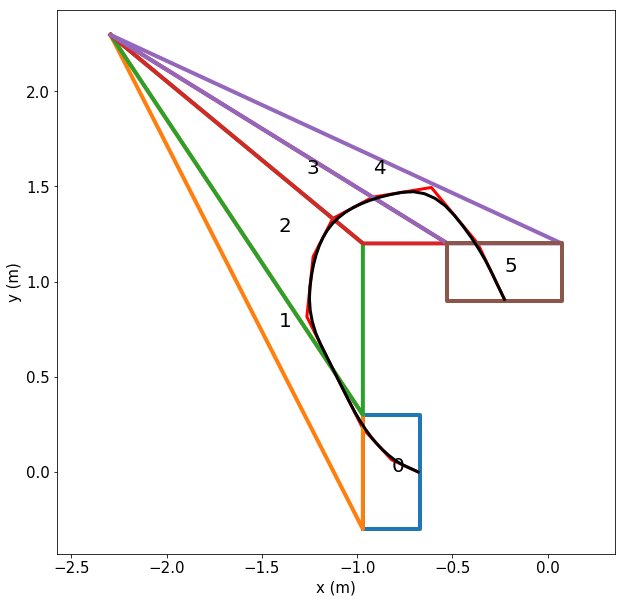

SETTING ENDPOINTS
Calculated C-Space: 0.266806 seconds
Set up graph: 0.261409 seconds
finding_vertex POINT (-1.8125 0) 0.0
finding_vertex POINT (0 0.90625) 0.0
found path endpoint hulls 46 49


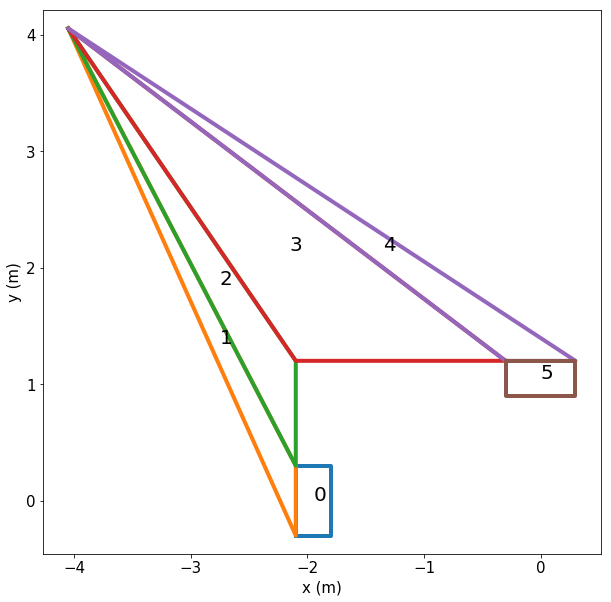

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002570 seconds
ADDING COSTS
Number of costs 12
0.006581 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.121692 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.244460 seconds

Time Scaling target: 1.000000, result: 1.000000


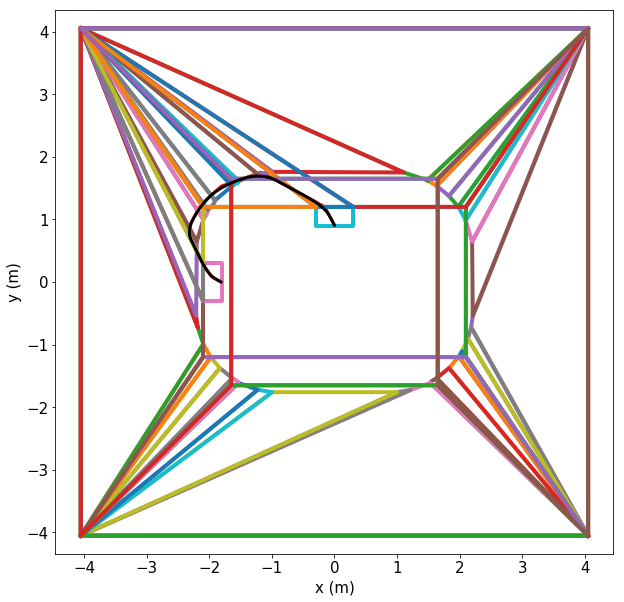

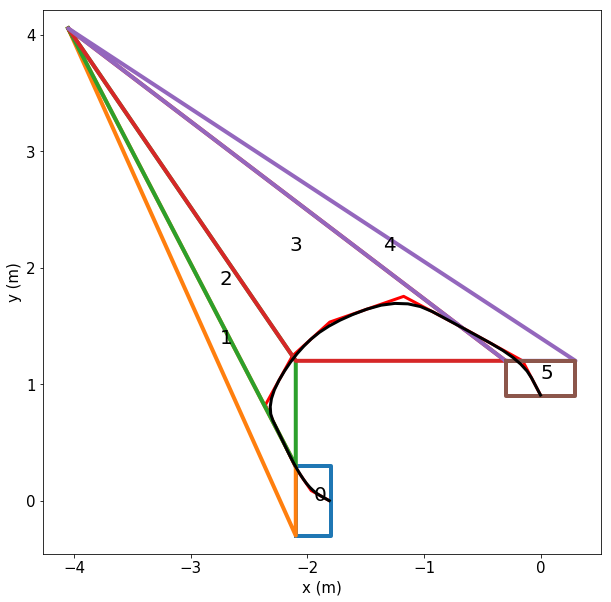

In [34]:
boats = {'line no-init':(None, ShapeBoat),
         'spline no-init':(None, ShapeBoat_spline),
         'spline init':(ShapeBoat_spline, ShapeBoat_spline)
        }

results = experiments(tests, boats)

In [10]:
table = print_results_tables(results)

line no-init
<type 'list'>
experiment           solve_time_init      solve_time_final    solve_time    pos_cost_avg    ang_cost_avg
-------------------  -----------------  ------------------  ------------  --------------  --------------
10_shinkyu2                                          0.141         0.141           2.011           9.744
11_shinkyu3-1                                        0.135         0.135           1.831           0.000
12_shinkyu3-2                                        0.105         0.105           1.500           0.000
1_line_to_L                                          0.120         0.120           1.008           0.000
2_T_to_block                                         0.132         0.132           9.224           0.000
3_line_to_block                                      0.126         0.126           3.272           0.000
4_line_to_L_2                                        0.120         0.120           1.596           9.744
5_U_to_block                

In [35]:
#print in Banti Thesis Format
print_results_tables(results, latex=True)

line no-init
experiment            solve_time_init    solve_time_final    solve_time        pos_cost_avg       ang_cost_avg
--------------------  -----------------  ------------------  ----------------  -----------------  --------------
& 10 pool b           & -                & 0.100             & \textbf{0.101}  & 4.660            & 9.740 \\
& 1 line to L         & -                & 0.120             & \textbf{0.122}  & 1.540            & 0.000 \\
& 2 T to block        & -                & 0.110             & 0.110           & \textbf{12.226}  & 0.000 \\
& 3 line to block     & -                & 0.110             & \textbf{0.115}  & 4.530            & 0.000 \\
& 4 line to L 2       & -                & 0.120             & \textbf{0.121}  & 2.010            & 9.740 \\
& 5 U to block        & -                & 0.060             & \textbf{0.057}  & \textbf{8.892}   & 38.980 \\
& 6 line to block 2   & -                & 0.190             & \textbf{0.188}  & 5.610            & 0.000 \\

In [72]:
write_results(results, 'result_slow')

NameError: name 'results' is not defined